###**MACHINE LEARNING PIPELINE**

*  Data Preprocessing
*  Exploratory Data Analysis
*   Feature Engineering
*   Model Building
*   Model Validation

# **IMPORTING LIBRARIES**

In [ ]:
#importing all required libraries
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, RocCurveDisplay



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Financial_data[1].csv")
pd.set_option('display.max_columns', None)
df

/tmp/ipython-input-2-4213833125.py:1: DtypeWarning: Columns (34,37,38,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Financial_data[1].csv")


ReportAsOfEOD                                LoanId  LoanNumber  \
0         2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1         2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2         2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3         2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4         2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   
...              ...                                   ...         ...   
134524    2020-01-27  A9C9EF0F-4E79-4930-BA8A-A4130077FCC2      283484   
134525    2020-01-27  787345C2-7606-4F72-8FE2-A4170082D77C      285168   
134526    2020-01-27  E2D3384D-289A-4B4D-A2DA-A40F00F7C755      281602   
134527    2020-01-27  7CC7AB74-995B-4467-958A-A41700F78D59      285431   
134528    2020-01-27  3A0DEBF3-292C-4EB4-B71A-A4170157749D      285630   

                ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0       2009-06-11 16:40:39  2009-06-11 16:40:39                     0   
1       2009-06-10 15:48:57  2009-06-10 15:48:57                     0   
2       2009-06-05 19:12:29  2009-06-05 19:12:29                     0   
3       2009-06-13 12:01:20  2009-06-13 12:01:20                     0   
4       2009-06-10 10:17:13  2009-06-10 10:17:13                     0   
...                     ...                  ...                   ...   
134524  2015-01-02 16:31:36  2015-01-02 16:31:36                  2515   
134525  2015-01-05 16:14:26  2015-01-05 16:14:26                  1880   
134526  2015-01-02 14:04:27  2015-01-02 14:04:27                  1975   
134527  2015-01-05 16:56:12  2015-01-05 16:56:12                  1840   
134528  2015-01-06 11:07:06  2015-01-06 11:07:06                  2990   

        BidsApi  BidsManual   UserName  NewCreditCustomer  \
0             0    115.0410       KARU               True   
1             0    140.6057   koort681              False   
2             0    319.5580        0ie               True   
3             0     57.5205     Alyona               True   
4             0    319.5582        Kai               True   
...         ...         ...        ...                ...   
134524        0    485.0000  BO73K5A6A               True   
134525        0   1120.0000   BO311A49              False   
134526        0    525.0000  BO41K639A               True   
134527        0   1160.0000   BO45A925              False   
134528        0     10.0000  BO152923A              False   

       LoanApplicationStartedDate    LoanDate ContractEndDate  \
0             2009-06-11 16:40:39  2009-06-16      2010-07-06   
1             2009-06-10 15:48:57  2009-06-15      2009-07-07   
2             2009-06-05 19:12:29  2009-06-15             NaN   
3             2009-06-13 12:01:20  2009-06-15      2010-09-15   
4             2009-06-10 10:17:13  2009-06-14      2016-07-28   
...                           ...         ...             ...   
134524        2015-01-01 07:17:03  2015-01-06      2019-02-13   
134525        2015-01-05 07:56:22  2015-01-06      2019-02-07   
134526        2014-12-28 15:01:47  2015-01-06             NaN   
134527        2015-01-05 15:01:18  2015-01-06      2019-12-23   
134528        2015-01-05 20:50:24  2015-01-06             NaN   

       FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0            2009-07-27            2010-06-25        2010-06-25   
1            2009-07-15            2009-07-15        2009-07-15   
2            2009-07-27            2011-02-25        2014-05-13   
3            2009-07-15            2010-09-15        2010-09-15   
4            2009-07-27            2010-06-25        2010-06-25   
...                 ...                   ...               ...   
134524       2015-03-02            2020-02-03        2020-02-03   
134525       2015-03-05            2020-02-05        2019-02-20   
134526       2015-03-02            2020-02-03        2020-02-03   
134527       2015-03-02            2020-02-03

# TARGET COLUMN CREATION

We create a Target column on the basis of  below mentioned data to find the individual is eligible for loan or not

* **DefaultDate** _ The date when loan went into defaulted state and collection process was started
* **WorseLateCategory** _	Displays the last longest period of days when the loan was in Principal Debt
* **CurrentDebtDaysPrimary** _ How long the loan has been in Principal Debt
* **Status** _ The current status of the loan application
* **PrincipalLateAmount** _ Principal debt amount
* **InterestAndPenaltyBalance** _ Unpaid interest and penalties
* **Amount** _ Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market

In [ ]:
numeric_columns = ['WorseLateCategory', 'CurrentDebtDaysPrimary', 'PrincipalLateAmount', 'InterestAndPenaltyBalance']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

def determine_eligibility(row):
    status = str(row.get('Status', '')).lower()

    if pd.notnull(row.get('DefaultDate')):
        return 0
    elif 'default' in status or 'charged off' in status:
        return 0
    elif row.get('WorseLateCategory', 0) and row['WorseLateCategory'] >= 60:
        return 0
    elif row.get('CurrentDebtDaysPrimary', 0) and row['CurrentDebtDaysPrimary'] >= 60:
        return 0
    elif row.get('PrincipalLateAmount', 0) and row['PrincipalLateAmount'] > 0:
        return 0
    elif row.get('InterestAndPenaltyBalance', 0) and row['InterestAndPenaltyBalance'] > 0:
        return 0
    else:
        return 1

df['LoanEligibility'] = df.apply(determine_eligibility, axis=1)

# Save the result
df.to_csv('/content/drive/MyDrive/Financial_data_with_eligibility.csv', index=False)

df.head()


ReportAsOfEOD                                LoanId  LoanNumber  \
0    2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1    2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2    2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3    2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4    2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   

           ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  2009-06-11 16:40:39  2009-06-11 16:40:39                     0        0   
1  2009-06-10 15:48:57  2009-06-10 15:48:57                     0        0   
2  2009-06-05 19:12:29  2009-06-05 19:12:29                     0        0   
3  2009-06-13 12:01:20  2009-06-13 12:01:20                     0        0   
4  2009-06-10 10:17:13  2009-06-10 10:17:13                     0        0   

   BidsManual  UserName  NewCreditCustomer LoanApplicationStartedDate  \
0    115.0410      KARU               True        2009-06-11 16:40:39   
1    140.6057  koort681              False        2009-06-10 15:48:57   
2    319.5580       0ie               True        2009-06-05 19:12:29   
3     57.5205    Alyona               True        2009-06-13 12:01:20   
4    319.5582       Kai               True        2009-06-10 10:17:13   

     LoanDate ContractEndDate FirstPaymentDate MaturityDate_Original  \
0  2009-06-16      2010-07-06       2009-07-27            2010-06-25   
1  2009-06-15      2009-07-07       2009-07-15            2009-07-15   
2  2009-06-15             NaN       2009-07-27            2011-02-25   
3  2009-06-15      2010-09-15       2009-07-15            2010-09-15   
4  2009-06-14      2016-07-28       2009-07-27            2010-06-25   

  MaturityDate_Last  ApplicationSignedHour  ApplicationSignedWeekday  \
0        2010-06-25                     17                         5   
1        2009-07-15                     20                         4   
2        2014-05-13                     20                         6   
3        2010-09-15                     12                         7   
4        2010-06-25                     10                         4   

   VerificationType  LanguageCode  Age DateOfBirth  Gender Country  \
0               2.0             1   61  1947-11-26     1.0      EE   
1               2.0             1   48  1960-11-05     1.0      EE   
2               2.0             1   58  1950-11-13     1.0      EE   
3               2.0             1   23  1986-03-29     1.0      EE   
4               2.0             1   25  1983-09-30     1.0      EE   

   AppliedAmount    Amount  Interest  LoanDuration  MonthlyPayment    County  \
0       319.5582  115.0408      30.0            12             NaN     HARJU   
1       191.7349  140.6057      25.0             1             NaN  IDA-VIRU   
2       319.5582  319.5409      25.0            20             NaN     PÄRNU   
3       127.8233   57.5205      45.0            15             NaN     HARJU   
4       319.5582  319.5436      30.0            12             NaN     TARTU   

           City  UseOfLoan  Education  MaritalStatus NrOfDependants  \
0       TALLINN          7        3.0            1.0              0   
1  KOHTLA-JARVE          7        5.0            4.0              0   
2         PÄRNU          2        4.0            1.0              0   
3      PALDISKI          0        2.0            3.0              1   
4         TARTU          6        4.0            2.0              0   

   EmploymentStatus EmploymentDurationCurrentEmployer  \
0               3.0                        UpTo3Years   
1               3.0                    MoreThan5Years   
2               3.0                        UpTo4Years   
3               NaN                        UpTo2Years   
4               3.0                        UpTo2Years   

          EmploymentPosition   WorkExperience  OccupationArea  \
0          klienditeenindaja  MoreThan25Years             7.0   
1  Õppealaj

#DATA PREPROCESSING
* HANDLING NULL VALUES
* HANDLING DUPLICATES
* CHECKING FOR DATATYPE

In [ ]:
df.tail(10)

ReportAsOfEOD                                LoanId  LoanNumber  \
134519    2020-01-27  18359372-2C67-4D39-ABCB-A416000B0C2C      284810   
134520    2020-01-27  C177B65A-FE74-444C-B802-A41200ECF58A      283360   
134521    2020-01-27  5B0FB00F-147E-4225-BC71-A41401290B31      284235   
134522    2020-01-27  12E61F86-4C35-4526-A143-A413013BE786      283622   
134523    2020-01-27  DB2067BB-FA75-4E1A-B961-A41100E5FDFB      282863   
134524    2020-01-27  A9C9EF0F-4E79-4930-BA8A-A4130077FCC2      283484   
134525    2020-01-27  787345C2-7606-4F72-8FE2-A4170082D77C      285168   
134526    2020-01-27  E2D3384D-289A-4B4D-A2DA-A40F00F7C755      281602   
134527    2020-01-27  7CC7AB74-995B-4467-958A-A41700F78D59      285431   
134528    2020-01-27  3A0DEBF3-292C-4EB4-B71A-A4170157749D      285630   

                ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
134519  2015-01-05 23:34:23  2015-01-05 23:34:23                  2000   
134520  2014-12-31 16:06:57  2014-12-31 16:06:57                   695   
134521  2015-01-06 10:49:26  2015-01-06 10:49:26                   600   
134522  2015-01-02 15:31:52  2015-01-02 15:31:52                  2425   
134523  2014-12-31 20:09:45  2014-12-31 20:09:45                  2185   
134524  2015-01-02 16:31:36  2015-01-02 16:31:36                  2515   
134525  2015-01-05 16:14:26  2015-01-05 16:14:26                  1880   
134526  2015-01-02 14:04:27  2015-01-02 14:04:27                  1975   
134527  2015-01-05 16:56:12  2015-01-05 16:56:12                  1840   
134528  2015-01-06 11:07:06  2015-01-06 11:07:06                  2990   

        BidsApi  BidsManual   UserName  NewCreditCustomer  \
134519        0         0.0  BOK15519A               True   
134520        0      1205.0  BO749761A              False   
134521        0         0.0  BOKAA919A               True   
134522        0       575.0  BO226719A               True   
134523        0       815.0   BO473372              False   
134524        0       485.0  BO73K5A6A               True   
134525        0      1120.0   BO311A49              False   
134526        0       525.0  BO41K639A               True   
134527        0      1160.0   BO45A925              False   
134528        0        10.0  BO152923A              False   

       LoanApplicationStartedDate    LoanDate ContractEndDate  \
134519        2015-01-04 00:40:13  2015-01-05             NaN   
134520        2014-12-31 14:22:50  2015-01-06             NaN   
134521        2015-01-02 18:01:37  2015-01-06             NaN   
134522        2015-01-01 19:10:10  2015-01-06             NaN   
134523        2014-12-30 13:57:30  2015-01-06             NaN   
134524        2015-01-01 07:17:03  2015-01-06      2019-02-13   
134525        2015-01-05 07:56:22  2015-01-06      2019-02-07   
134526        2014-12-28 15:01:47  2015-01-06             NaN   
134527        2015-01-05 15:01:18  2015-01-06      2019-12-23   
134528        2015-01-05 20:50:24  2015-01-06             NaN   

       FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
134519       2015-02-25            2020-01-27        2020-01-27   
134520       2015-02-20            2020-01-20        2020-01-20   
134521       2015-03-02            2020-02-03        2020-02-03   
134522       2015-03-05            2020-02-05        2020-02-05   
134523       2015-02-16            2020-01-15        2020-01-15   
134524       2015-03-02            2020-02-03        2020-02-03   
134525       2015-03-05            2020-02-05        2019-02-20   
134526       2015-03-02            2020-02-03        2020-02-03   
134527       2015-03-02            2020-02-03        2020-08-03   
134528       2015-03-03            2020-02-03        2020-08-12   

        ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
134519                     23                         2               1.0   
134520                     16                         4               3.0   
134521              

In [ ]:
df.shape

(134529, 113)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 113 entries, ReportAsOfEOD to LoanEligibility
dtypes: bool(3), float64(57), int64(15), object(38)
memory usage: 113.3+ MB


In [ ]:
df.describe()

LoanNumber  BidsPortfolioManager        BidsApi     BidsManual  \
count  1.345290e+05         134529.000000  134529.000000  134529.000000   
mean   9.449392e+05            966.452876      29.111664     559.332590   
std    4.786738e+05           1355.686016     150.159148     750.360512   
min    3.700000e+01              0.000000       0.000000       0.000000   
25%    6.206790e+05            155.000000       0.000000      96.000000   
50%    9.235970e+05            465.000000       0.000000     317.000000   
75%    1.311025e+06           1218.000000       5.000000     729.000000   
max    1.855339e+06          10625.000000    7570.000000   10630.000000   

       ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
count          134529.000000             134529.000000     134484.000000   
mean               13.374640                  3.907908          2.817257   
std                 4.992375                  1.726192          1.407908   
min                 0.000000                  1.000000          0.000000   
25%                10.000000                  2.000000          1.000000   
50%                13.000000                  4.000000          4.000000   
75%                17.000000                  5.000000          4.000000   
max                23.000000                  7.000000          4.000000   

        LanguageCode            Age         Gender  AppliedAmount  \
count  134529.000000  134529.000000  134484.000000  134529.000000   
mean        2.827874      40.819295       0.442097    2727.947540   
std         1.959802      12.348693       0.636083    2374.439168   
min         1.000000       0.000000       0.000000      31.955800   
25%         1.000000      31.000000       0.000000     800.000000   
50%         3.000000      40.000000       0.000000    2125.000000   
75%         4.000000      50.000000       1.000000    4145.000000   
max        22.000000      77.000000       2.000000   10632.000000   

              Amount       Interest   LoanDuration  MonthlyPayment  \
count  134529.000000  134529.000000  134529.000000   127844.000000   
mean     2543.872472      35.889583      46.151573      119.083443   
std      2170.128183      26.288644      15.202688      114.737919   
min         6.390000       3.000000       1.000000        0.000000   
25%       744.000000      20.000000      36.000000       34.990000   
50%      2125.000000      30.930000      48.000000       97.380000   
75%      3600.000000      40.400000      60.000000      157.512500   
max     10632.000000     264.310000      60.000000     2368.540000   

           UseOfLoan      Education  MaritalStatus  EmploymentStatus  \
count  134529.000000  134484.000000  134484.000000     134332.000000   
mean        0.343026       3.680713      -0.109165          0.153716   
std         3.311925       1.174134       1.555404          1.940581   
min        -1.000000      -1.000000      -1.000000         -1.000000   
25%        -1.000000       3.000000      -1.000000         -1.000000   
50%        -1.000000       4.000000      -1.000000         -1.000000   
75%         0.000000       5.000000       1.000000          3.000000   
max       110.000000       5.000000       5.000000          6.000000   

       OccupationArea  HomeOwnershipType  IncomeFromPrincipalEmployer  \
count   134443.000000      132877.000000                134529.000000   
mean         1.381708           3.357511                   437.143384   
std          4.880079           2.844225                  1786.569939   
min         -1.000000          -1.000000                     0.000000   
25%         -1.000000           1.000000                     0.000000   
50%         -1.000000           2.000000                     0.000000   
75%          1.000000           4.000000                   326.000000   
max         19.000000          10.000000                228400.000000   

       IncomeFromPension  IncomeFromFamilyAllowance  IncomeFromSocialWelfare  \
count   

## Handling Null Values

In [ ]:
pd.set_option('display.max_rows', 200)

missing_counts = df.isnull().sum()
missing_counts


ReportAsOfEOD                                  0
LoanId                                         0
LoanNumber                                     0
ListedOnUTC                                    0
BiddingStartedOn                               0
BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
UserName                                       0
NewCreditCustomer                              0
LoanApplicationStartedDate                     0
LoanDate                                       0
ContractEndDate                            75546
FirstPaymentDate                               0
MaturityDate_Original                          0
MaturityDate_Last                              0
ApplicationSignedHour                          0
ApplicationSignedWeekday                       0
VerificationType                              45
LanguageCode                                   0
Age                                            0
DateOfBirth                                    0
Gender                                        45
Country                                        0
AppliedAmount                                  0
Amount                                         0
Interest                                       0
LoanDuration                                   0
MonthlyPayment                              6685
County                                     36840
City                                        9794
UseOfLoan                                      0
Education                                     45
MaritalStatus                                 45
NrOfDependants                             98929
EmploymentStatus                             197
EmploymentDurationCurrentEmployer            876
EmploymentPosition                         98439
WorkExperience                             98007
OccupationArea                                86
HomeOwnershipType                           1652
IncomeFromPrincipalEmployer                    0
IncomeFromPension                              0
IncomeFromFamilyAllowance                      0
IncomeFromSocialWelfare                        0
IncomeFromLeavePay                             0
IncomeFromChildSupport                         0
IncomeOther                                    0
IncomeTotal                                    0
ExistingLiabilities                            0
LiabilitiesTotal                               0
RefinanceLiabilities                           0
DebtToIncome                                  45
FreeCash                                      45
MonthlyPaymentDay                              0
ActiveScheduleFirstPaymentReached              0
PlannedPrincipalTillDate                   80070
PlannedInterestTillDate                     3942
LastPaymentOn                               9531
CurrentDebtDaysPrimary                     86011
DebtOccuredOn                              86011
CurrentDebtDaysSecondary                   82279
DebtOccuredOnForSecondary                  82279
ExpectedLoss                                2636
LossGivenDefault                            2636
ExpectedReturn                              2636
ProbabilityOfDefault                        2636
DefaultDate                                91614
PrincipalOverdueBySchedule                 14837
PlannedPrincipalPostDefault                91614
PlannedInterestPostDefault                 91614
EAD1                                       91614
EAD2                                       91614
PrincipalRecovery                          91614
InterestRecovery                           91614
RecoveryStage                              57288
StageActiveSince                           53575
ModelVersion                                2636
Rating                                      2730
EL_V0                                     129960
Rating_V0                                 129960
EL_V1                          

In [ ]:
most_common = df['VerificationType'].mode()[0]
df['VerificationType'] = df['VerificationType'].fillna(most_common)
df['VerificationType']

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
134524    3.0
134525    3.0
134526    1.0
134527    4.0
134528    4.0
Name: VerificationType, Length: 134529, dtype: float64

In [ ]:
df['Gender'] = df['Gender'].fillna(2)
df['Gender']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
134524    0.0
134525    0.0
134526    0.0
134527    1.0
134528    1.0
Name: Gender, Length: 134529, dtype: float64

In [ ]:
df['MonthlyPayment'] = df.groupby(pd.cut(df['Amount'], bins=5))['MonthlyPayment'].transform(lambda x: x.fillna(x.median()))
df['MonthlyPayment']

/tmp/ipython-input-11-3780121788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['MonthlyPayment'] = df.groupby(pd.cut(df['Amount'], bins=5))['MonthlyPayment'].transform(lambda x: x.fillna(x.median()))


0          46.69
1          46.69
2          46.69
3          46.69
4          46.69
           ...  
134524    107.68
134525     85.33
134526     80.42
134527     84.51
134528    106.74
Name: MonthlyPayment, Length: 134529, dtype: float64

In [ ]:
most_common_county = df['County'].mode()[0]
df['County'] = df['County'].fillna(most_common_county)
df['County']

0                    HARJU
1                 IDA-VIRU
2                    PÄRNU
3                    HARJU
4                    TARTU
                ...       
134524         PÄIJÄT-HÄME
134525    POHJOIS KARJAALA
134526     VARSINAIS-SUOMI
134527               VALGA
134528               HARJU
Name: County, Length: 134529, dtype: object

In [ ]:
# Fill nulls with the most common county
most_common_county = df['County'].mode()[0]
df['County'] = df['County'].fillna(most_common_county)

# Display value counts
print(df['County'].value_counts())


County
Harju maakond       59064
HARJU                8108
Tartu maakond        6181
UUSIMAA              6076
Ida-Viru maakond     4197
                    ...  
.                       1
JÕGEVA VALD             1
HARJU MAAKOND           1
PAIDE LINN              1
HIIUMAA                 1
Name: count, Length: 1010, dtype: int64


In [ ]:
most_common_city = df['City'].mode()[0]
df['City'] = df['City'].fillna(most_common_city)
df['City']

0              TALLINN
1         KOHTLA-JARVE
2                PÄRNU
3             PALDISKI
4                TARTU
              ...     
134524           LAHTI
134525         JOENSUU
134526           SAUVO
134527           VALGA
134528         TALLINN
Name: City, Length: 134529, dtype: object

In [ ]:
most_common_edu = df['Education'].mode()[0]
df['Education'] = df['Education'].fillna(most_common_edu)
df['Education']

0         3.0
1         5.0
2         4.0
3         2.0
4         4.0
         ... 
134524    3.0
134525    3.0
134526    3.0
134527    5.0
134528    4.0
Name: Education, Length: 134529, dtype: float64

In [ ]:
most_common_status = df['MaritalStatus'].mode()[0]
df['MaritalStatus'] = df['MaritalStatus'].fillna(most_common_status)
df['MaritalStatus']

0         1.0
1         4.0
2         1.0
3         3.0
4         2.0
         ... 
134524    3.0
134525    3.0
134526    1.0
134527    1.0
134528    3.0
Name: MaritalStatus, Length: 134529, dtype: float64

In [ ]:
most_common_status = df['EmploymentStatus'].mode()[0]
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(most_common_status)
df['EmploymentStatus']

0         3.0
1         3.0
2         3.0
3        -1.0
4         3.0
         ... 
134524    3.0
134525    3.0
134526    5.0
134527    3.0
134528    3.0
Name: EmploymentStatus, Length: 134529, dtype: float64

In [ ]:
# Display value counts
print(df['EmploymentDurationCurrentEmployer'].value_counts())

EmploymentDurationCurrentEmployer
MoreThan5Years    52089
UpTo5Years        28411
UpTo1Year         24187
Retiree            7552
UpTo2Years         6498
UpTo3Years         5435
Other              5048
UpTo4Years         3684
TrialPeriod         749
Name: count, dtype: int64


In [ ]:
# Step 1: Define mapping from string durations to integers
duration_mapping = {
    'UpTo1Year': 1,
    'UpTo2Years': 2,
    'UpTo3Years': 3,
    'UpTo4Years': 4,
    'UpTo5Years': 5,
    'MoreThan5Years': 6,
    'Other': 0,
    'Unknown': 0,
    np.nan: 0  # Optional: handle NaN if in string format
}

# Step 2: Convert all values to string first to avoid errors, then map
df['EmploymentDurationCurrentEmployer'] = df['EmploymentDurationCurrentEmployer'].astype(str)
df['EmploymentDurationCurrentEmployer'] = df['EmploymentDurationCurrentEmployer'].map(duration_mapping)

# Step 3: Now safely convert to float (if not already)
df['EmploymentDurationCurrentEmployer'] = pd.to_numeric(df['EmploymentDurationCurrentEmployer'], errors='coerce')

# Step 4: Fill nulls with the mean
mean_duration = df['EmploymentDurationCurrentEmployer'].mean()
df['EmploymentDurationCurrentEmployer'] = df['EmploymentDurationCurrentEmployer'].fillna(mean_duration)


In [ ]:
most_common_occupation = df['OccupationArea'].mode()[0]
df['OccupationArea'] = df['OccupationArea'].fillna(most_common_occupation)
df['OccupationArea']

0          7.0
1         16.0
2          9.0
3          1.0
4          7.0
          ... 
134524     1.0
134525     8.0
134526     6.0
134527    17.0
134528    19.0
Name: OccupationArea, Length: 134529, dtype: float64

In [ ]:
most_common_ownership = df['HomeOwnershipType'].mode()[0]
df['HomeOwnershipType'] = df['HomeOwnershipType'].fillna(most_common_ownership)
df['HomeOwnershipType']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
134524    5.0
134525    1.0
134526    1.0
134527    4.0
134528    2.0
Name: HomeOwnershipType, Length: 134529, dtype: float64

In [ ]:
median_dti = df['DebtToIncome'].median()
df['DebtToIncome'] = df['DebtToIncome'].fillna(median_dti)
df['DebtToIncome']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
134524     7.69
134525    31.58
134526     3.22
134527    44.35
134528    35.03
Name: DebtToIncome, Length: 134529, dtype: float64

In [ ]:
median_freecash = df['FreeCash'].median()
df['FreeCash'] = df['FreeCash'].fillna(median_freecash)
df['FreeCash']

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
           ...   
134524     792.32
134525     520.67
134526    1069.58
134527      50.49
134528      74.86
Name: FreeCash, Length: 134529, dtype: float64

In [ ]:
# Drop the specified columns
df = df.drop(columns=['ContractEndDate','NrOfDependants','EmploymentPosition', 'WorkExperience','PlannedPrincipalTillDate','CurrentDebtDaysPrimary','DebtOccuredOn',
                      'CurrentDebtDaysSecondary','DebtOccuredOnForSecondary','DefaultDate','PlannedPrincipalPostDefault',
                      'PlannedInterestPostDefault','EAD1','EAD2','PrincipalRecovery','InterestRecovery','RecoveryStage',
                      'StageActiveSince','EL_V0','Rating_V0','EL_V1','Rating_V1','Rating_V2','ActiveLateCategory','WorseLateCategory',
                      'CreditScoreEsEquifaxRisk','CreditScoreFiAsiakasTietoRiskGrade','CreditScoreEeMini','PrincipalWriteOffs',
                      'InterestAndPenaltyWriteOffs','PreviousEarlyRepaymentsBefoleLoan','GracePeriodStart','GracePeriodEnd','NextPaymentDate',
                      'ReScheduledOn','PrincipalDebtServicingCost','InterestAndPenaltyDebtServicingCost','ActiveLateLastPaymentCategory',
                      ])




In [ ]:
median_interest = df['PlannedInterestTillDate'].median()
df['PlannedInterestTillDate'] = df['PlannedInterestTillDate'].fillna(median_interest)
df['PlannedInterestTillDate']

0          319.0800
1           45.8300
2          197.2926
3          293.1000
4          833.8100
            ...    
134524    3000.0000
134525      16.3200
134526    2428.4400
134527    2588.2100
134528    2260.0000
Name: PlannedInterestTillDate, Length: 134529, dtype: float64

In [ ]:
print(df['LastPaymentOn'].value_counts().sort_index())


LastPaymentOn
2009-04-14       1
2009-04-16       1
2009-04-21       1
2009-05-15       1
2009-05-21       1
              ... 
2020-01-22    1223
2020-01-23    1727
2020-01-24    1032
2020-01-25     107
2020-01-26     161
Name: count, Length: 2888, dtype: int64


In [ ]:
df['LastPaymentOn'] = pd.to_datetime(df['LastPaymentOn'], errors='coerce')
median_date = df['LastPaymentOn'].median()
df['LastPaymentOn'] = df['LastPaymentOn'].fillna(median_date)
df['LastPaymentOn']

0        2010-07-06
1        2009-07-07
2        2012-10-01
3        2010-09-15
4        2015-07-16
            ...    
134524   2019-02-12
134525   2019-02-07
134526   2020-01-17
134527   2019-12-20
134528   2019-10-15
Name: LastPaymentOn, Length: 134529, dtype: datetime64[ns]

In [ ]:
median_loss = df['ExpectedLoss'].median()
df['ExpectedLoss'] = df['ExpectedLoss'].fillna(median_loss)
df['ExpectedLoss']

0         0.123398
1         0.123398
2         0.123398
3         0.123398
4         0.123398
            ...   
134524    0.146732
134525    0.053246
134526    0.104219
134527    0.035612
134528    0.116235
Name: ExpectedLoss, Length: 134529, dtype: float64

In [ ]:
median_lgd = df['LossGivenDefault'].median()
df['LossGivenDefault'] = df['LossGivenDefault'].fillna(median_lgd)
df['LossGivenDefault']

0         0.506748
1         0.506748
2         0.506748
3         0.506748
4         0.506748
            ...   
134524    0.900000
134525    0.900000
134526    0.900000
134527    0.650000
134528    0.650000
Name: LossGivenDefault, Length: 134529, dtype: float64

In [ ]:
df['ExpectedReturn'] = pd.to_numeric(df['ExpectedReturn'], errors='coerce')
median_return = df['ExpectedReturn'].median()
df['ExpectedReturn'] = df['ExpectedReturn'].fillna(median_return)
df['ExpectedReturn']

0         0.134049
1         0.134049
2         0.134049
3         0.134049
4         0.134049
            ...   
134524    0.163368
134525    0.129254
134526    0.144081
134527    0.141788
134528    0.188765
Name: ExpectedReturn, Length: 134529, dtype: float64

In [ ]:
df['ProbabilityOfDefault'] = pd.to_numeric(df['ProbabilityOfDefault'], errors='coerce')
median_pd = df['ProbabilityOfDefault'].median()
df['ProbabilityOfDefault'] = df['ProbabilityOfDefault'].fillna(median_pd)
df['ProbabilityOfDefault']

0         0.234140
1         0.234140
2         0.234140
3         0.234140
4         0.234140
            ...   
134524    0.125412
134525    0.045510
134526    0.089076
134527    0.042144
134528    0.137556
Name: ProbabilityOfDefault, Length: 134529, dtype: float64

In [ ]:
df['PrincipalOverdueBySchedule'] = pd.to_numeric(df['PrincipalOverdueBySchedule'], errors='coerce')
df['PrincipalOverdueBySchedule'] = df['PrincipalOverdueBySchedule'].fillna(0)
df['PrincipalOverdueBySchedule']

0           0.00
1           0.00
2         116.35
3           0.00
4           0.00
           ...  
134524      0.00
134525      0.00
134526    558.68
134527    167.41
134528    897.50
Name: PrincipalOverdueBySchedule, Length: 134529, dtype: float64

In [ ]:
most_common_version = df['ModelVersion'].mode()[0]
df['ModelVersion'] = df['ModelVersion'].replace('nan', np.nan)
df['ModelVersion'] = df['ModelVersion'].fillna(most_common_version)
df['ModelVersion']

0         6.0
1         6.0
2         6.0
3         6.0
4         6.0
         ... 
134524    1.0
134525    1.0
134526    1.0
134527    1.0
134528    1.0
Name: ModelVersion, Length: 134529, dtype: float64

In [ ]:
most_common_rating = df['Rating'].mode()[0]
df['Rating'] = df['Rating'].fillna(most_common_rating)
df['Rating']

0         E
1         E
2         E
3         E
4         E
         ..
134524    E
134525    B
134526    D
134527    B
134528    D
Name: Rating, Length: 134529, dtype: object

In [ ]:
df['PreviousRepaymentsBeforeLoan'] = df['PreviousRepaymentsBeforeLoan'].fillna(0)
df['PreviousRepaymentsBeforeLoan']

0           0.0000
1         258.6256
2           0.0000
3           0.0000
4           0.0000
            ...   
134524      0.0000
134525    389.3600
134526      0.0000
134527     96.8000
134528    242.6400
Name: PreviousRepaymentsBeforeLoan, Length: 134529, dtype: float64

In [ ]:
df['NextPaymentNr'] = df['NextPaymentNr'].fillna(0)
df['NextPaymentNr']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
134524    0.0
134525    0.0
134526    0.0
134527    0.0
134528    0.0
Name: NextPaymentNr, Length: 134529, dtype: float64

In [ ]:
print(df['NrOfScheduledPayments'].value_counts().sort_index())


NrOfScheduledPayments
1.0        23
2.0         1
3.0        52
4.0        12
5.0         8
6.0       215
7.0         4
8.0        12
9.0       248
10.0       17
11.0       24
12.0      631
13.0       14
14.0       26
15.0      122
16.0       20
17.0       23
18.0      548
19.0       38
20.0       46
21.0       51
22.0       60
23.0       51
24.0     1406
25.0       58
26.0       58
27.0      273
28.0       70
29.0      100
30.0      625
31.0      140
32.0      145
33.0      160
34.0      227
35.0      262
36.0    25002
37.0      213
38.0      234
39.0      492
40.0       94
41.0      122
42.0      260
43.0       89
44.0       83
45.0      100
46.0      120
47.0      135
48.0     5768
49.0      132
50.0      143
51.0     2153
52.0      153
53.0      206
54.0     1948
55.0      261
56.0      293
57.0      374
58.0      572
59.0      691
60.0    52350
61.0       13
63.0        5
66.0        3
72.0        9
Name: count, dtype: int64


In [ ]:
median_scheduled = df['NrOfScheduledPayments'].median()
df['NrOfScheduledPayments'] = df['NrOfScheduledPayments'].fillna(median_scheduled)
df['NrOfScheduledPayments']

0         60.0
1         60.0
2         60.0
3         60.0
4         60.0
          ... 
134524    60.0
134525    60.0
134526    60.0
134527    60.0
134528    60.0
Name: NrOfScheduledPayments, Length: 134529, dtype: float64

In [ ]:
df['CreditScoreEsMicroL'].isnull().sum()

np.int64(29574)

In [ ]:
most_common_rating = df['CreditScoreEsMicroL'].mode()[0]
df['CreditScoreEsMicroL'] = df['CreditScoreEsMicroL'].fillna(most_common_rating)
df['CreditScoreEsMicroL']

0         M
1         M
2         M
3         M
4         M
         ..
134524    M
134525    M
134526    M
134527    M
134528    M
Name: CreditScoreEsMicroL, Length: 134529, dtype: object

In [ ]:
df['CreditScoreEsMicroL'].isnull().sum()

np.int64(0)

In [ ]:
df.isnull().sum()



ReportAsOfEOD                             0
LoanId                                    0
LoanNumber                                0
ListedOnUTC                               0
BiddingStartedOn                          0
BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
UserName                                  0
NewCreditCustomer                         0
LoanApplicationStartedDate                0
LoanDate                                  0
FirstPaymentDate                          0
MaturityDate_Original                     0
MaturityDate_Last                         0
ApplicationSignedHour                     0
ApplicationSignedWeekday                  0
VerificationType                          0
LanguageCode                              0
Age                                       0
DateOfBirth                               0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
County                                    0
City                                      0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType                         0
IncomeFromPrincipalEmployer               0
IncomeFromPension                         0
IncomeFromFamilyAllowance                 0
IncomeFromSocialWelfare                   0
IncomeFromLeavePay                        0
IncomeFromChildSupport                    0
IncomeOther                               0
IncomeTotal                               0
ExistingLiabilities                       0
LiabilitiesTotal                          0
RefinanceLiabilities                      0
DebtToIncome                              0
FreeCash                                  0
MonthlyPaymentDay                         0
ActiveScheduleFirstPaymentReached         0
PlannedInterestTillDate                   0
LastPaymentOn                             0
ExpectedLoss                              0
LossGivenDefault                          0
ExpectedReturn                            0
ProbabilityOfDefault                      0
PrincipalOverdueBySchedule                0
ModelVersion                              0
Rating                                    0
Status                                    0
Restructured                              0
CreditScoreEsMicroL                       0
PrincipalPaymentsMade                     0
InterestAndPenaltyPaymentsMade            0
PrincipalBalance                          0
InterestAndPenaltyBalance                 0
NoOfPreviousLoansBeforeLoan               0
AmountOfPreviousLoansBeforeLoan           0
PreviousRepaymentsBeforeLoan              0
PreviousEarlyRepaymentsCountBeforeLoan    0
NextPaymentNr                             0
NrOfScheduledPayments                     0
LoanEligibility                           0
dtype: int64

## Handling Unwanted Values

In [ ]:
unwanted_strings = ['?', 'n/a', 'na', 'null', 'NaN']
df.isin(unwanted_strings).sum()

ReportAsOfEOD                             0
LoanId                                    0
LoanNumber                                0
ListedOnUTC                               0
BiddingStartedOn                          0
BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
UserName                                  0
NewCreditCustomer                         0
LoanApplicationStartedDate                0
LoanDate                                  0
FirstPaymentDate                          0
MaturityDate_Original                     0
MaturityDate_Last                         0
ApplicationSignedHour                     0
ApplicationSignedWeekday                  0
VerificationType                          0
LanguageCode                              0
Age                                       0
DateOfBirth                               0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
County                                    0
City                                      0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType                         0
IncomeFromPrincipalEmployer               0
IncomeFromPension                         0
IncomeFromFamilyAllowance                 0
IncomeFromSocialWelfare                   0
IncomeFromLeavePay                        0
IncomeFromChildSupport                    0
IncomeOther                               0
IncomeTotal                               0
ExistingLiabilities                       0
LiabilitiesTotal                          0
RefinanceLiabilities                      0
DebtToIncome                              0
FreeCash                                  0
MonthlyPaymentDay                         0
ActiveScheduleFirstPaymentReached         0
PlannedInterestTillDate                   0
LastPaymentOn                             0
ExpectedLoss                              0
LossGivenDefault                          0
ExpectedReturn                            0
ProbabilityOfDefault                      0
PrincipalOverdueBySchedule                0
ModelVersion                              0
Rating                                    0
Status                                    0
Restructured                              0
CreditScoreEsMicroL                       0
PrincipalPaymentsMade                     0
InterestAndPenaltyPaymentsMade            0
PrincipalBalance                          0
InterestAndPenaltyBalance                 0
NoOfPreviousLoansBeforeLoan               0
AmountOfPreviousLoansBeforeLoan           0
PreviousRepaymentsBeforeLoan              0
PreviousEarlyRepaymentsCountBeforeLoan    0
NextPaymentNr                             0
NrOfScheduledPayments                     0
LoanEligibility                           0
dtype: int64

## Handling Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

# EXPLORATORY DATA ANALYSIS


*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis


**Exploratory Data Analysis** _ the process of examining and visualizing datasets to Understand the structure and key characteristics of the data,Identify patterns, trends, and relationships,Detect missing values, outliers, or errors.


*   **Univariate Analysis** _ Univariate analysis examines one variable at a time to understand its distribution, central tendency, and spread (e.g., using histograms, boxplots, mean, median).
It helps identify patterns, outliers, or anomalies in a single feature without considering other variables.
*   **Bivariate Analysis** _ Bivariate analysis explores the relationship between two variables, often to assess correlation or dependency (e.g., scatter plots, correlation coefficients, cross-tabs).
It is commonly used to examine how an independent variable affects a dependent variable.
*   **Multivariate Analysis** _ Multivariate analysis involves examining more than two variables simultaneously to understand complex relationships and interactions (e.g., PCA, clustering, regression models).This type of analysis helps uncover patterns that may not be visible through individual or pairwise examination.



## Univariate Analysis

In [ ]:
df

ReportAsOfEOD                                LoanId  LoanNumber  \
0         2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1         2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2         2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3         2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4         2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   
...              ...                                   ...         ...   
134524    2020-01-27  A9C9EF0F-4E79-4930-BA8A-A4130077FCC2      283484   
134525    2020-01-27  787345C2-7606-4F72-8FE2-A4170082D77C      285168   
134526    2020-01-27  E2D3384D-289A-4B4D-A2DA-A40F00F7C755      281602   
134527    2020-01-27  7CC7AB74-995B-4467-958A-A41700F78D59      285431   
134528    2020-01-27  3A0DEBF3-292C-4EB4-B71A-A4170157749D      285630   

                ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0       2009-06-11 16:40:39  2009-06-11 16:40:39                     0   
1       2009-06-10 15:48:57  2009-06-10 15:48:57                     0   
2       2009-06-05 19:12:29  2009-06-05 19:12:29                     0   
3       2009-06-13 12:01:20  2009-06-13 12:01:20                     0   
4       2009-06-10 10:17:13  2009-06-10 10:17:13                     0   
...                     ...                  ...                   ...   
134524  2015-01-02 16:31:36  2015-01-02 16:31:36                  2515   
134525  2015-01-05 16:14:26  2015-01-05 16:14:26                  1880   
134526  2015-01-02 14:04:27  2015-01-02 14:04:27                  1975   
134527  2015-01-05 16:56:12  2015-01-05 16:56:12                  1840   
134528  2015-01-06 11:07:06  2015-01-06 11:07:06                  2990   

        BidsApi  BidsManual   UserName  NewCreditCustomer  \
0             0    115.0410       KARU               True   
1             0    140.6057   koort681              False   
2             0    319.5580        0ie               True   
3             0     57.5205     Alyona               True   
4             0    319.5582        Kai               True   
...         ...         ...        ...                ...   
134524        0    485.0000  BO73K5A6A               True   
134525        0   1120.0000   BO311A49              False   
134526        0    525.0000  BO41K639A               True   
134527        0   1160.0000   BO45A925              False   
134528        0     10.0000  BO152923A              False   

       LoanApplicationStartedDate    LoanDate FirstPaymentDate  \
0             2009-06-11 16:40:39  2009-06-16       2009-07-27   
1             2009-06-10 15:48:57  2009-06-15       2009-07-15   
2             2009-06-05 19:12:29  2009-06-15       2009-07-27   
3             2009-06-13 12:01:20  2009-06-15       2009-07-15   
4             2009-06-10 10:17:13  2009-06-14       2009-07-27   
...                           ...         ...              ...   
134524        2015-01-01 07:17:03  2015-01-06       2015-03-02   
134525        2015-01-05 07:56:22  2015-01-06       2015-03-05   
134526        2014-12-28 15:01:47  2015-01-06       2015-03-02   
134527        2015-01-05 15:01:18  2015-01-06       2015-03-02   
134528        2015-01-05 20:50:24  2015-01-06       2015-03-03   

       MaturityDate_Original MaturityDate_Last  ApplicationSignedHour  \
0                 2010-06-25        2010-06-25                     17   
1                 2009-07-15        2009-07-15                     20   
2                 2011-02-25        2014-05-13                     20   
3                 2010-09-15        2010-09-15                     12   
4                 2010-06-25        2010-06-25                     10   
...                      ...               ...                    ...   
134524            2020-02-03        2020-02-03                     16   
134525            2020-02-05        2019-02-20                     16   
134526            2020-02-03        2020-02-03


📊 Numerical Column: LoanNumber
count    1.345290e+05
mean     9.449392e+05
std      4.786738e+05
min      3.700000e+01
25%      6.206790e+05
50%      9.235970e+05
75%      1.311025e+06
max      1.855339e+06
Name: LoanNumber, dtype: float64

📊 Numerical Column: BidsPortfolioManager
count    134529.000000
mean        966.452876
std        1355.686016
min           0.000000
25%         155.000000
50%         465.000000
75%        1218.000000
max       10625.000000
Name: BidsPortfolioManager, dtype: float64

📊 Numerical Column: BidsApi
count    134529.000000
mean         29.111664
std         150.159148
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max        7570.000000
Name: BidsApi, dtype: float64

📊 Numerical Column: BidsManual
count    134529.000000
mean        559.332590
std         750.360512
min           0.000000
25%          96.000000
50%         317.000000
75%         729.000000
max       10630.000000
Name: BidsManual, dtype: float6

/tmp/ipython-input-46-3401025863.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 4))



📊 Numerical Column: HomeOwnershipType
count    134529.000000
mean          3.328561
std           2.838606
min          -1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: HomeOwnershipType, dtype: float64

📊 Numerical Column: IncomeFromPrincipalEmployer
count    134529.000000
mean        437.143384
std        1786.569939
min           0.000000
25%           0.000000
50%           0.000000
75%         326.000000
max      228400.000000
Name: IncomeFromPrincipalEmployer, dtype: float64

📊 Numerical Column: IncomeFromPension
count    134529.000000
mean         18.802698
std         150.849487
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        5038.000000
Name: IncomeFromPension, dtype: float64

📊 Numerical Column: IncomeFromFamilyAllowance
count    134529.000000
mean          5.682848
std          38.385899
min           0.000000
25%           0.000000
50%           0.000000
75%   

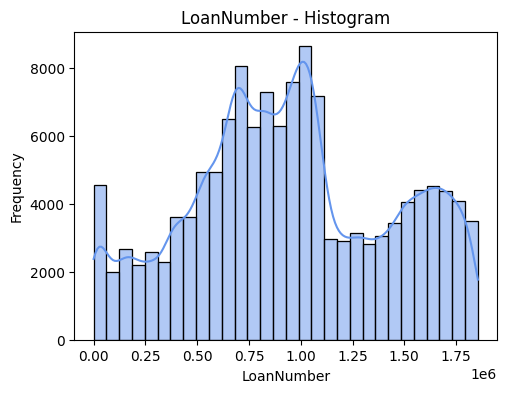

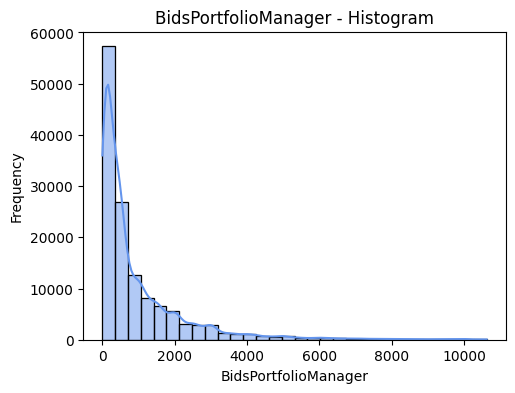

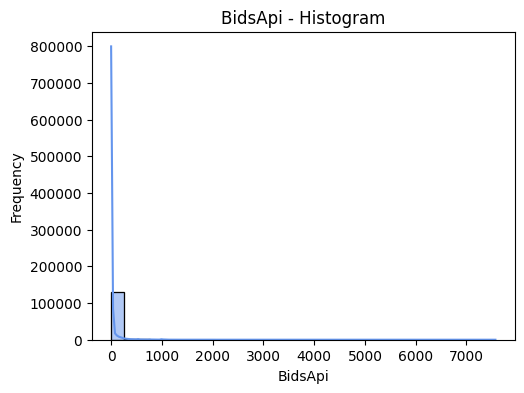

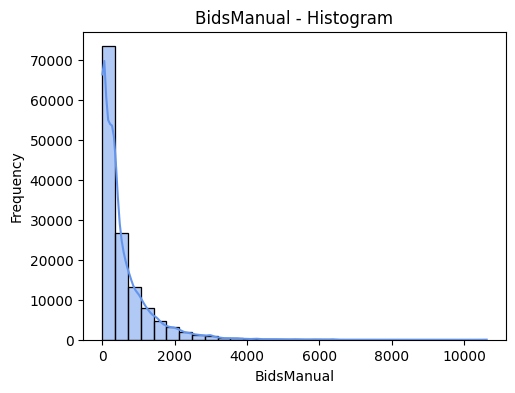

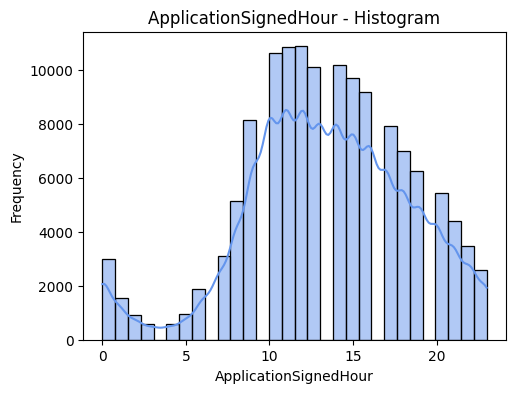

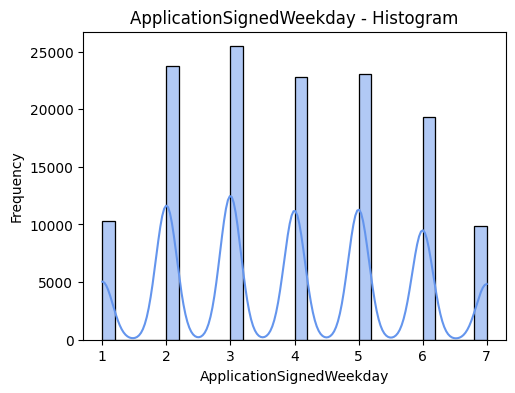

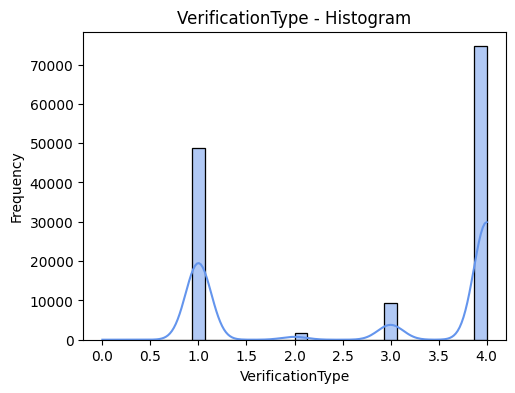

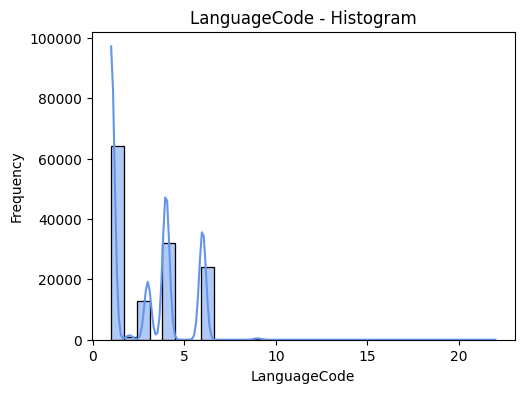

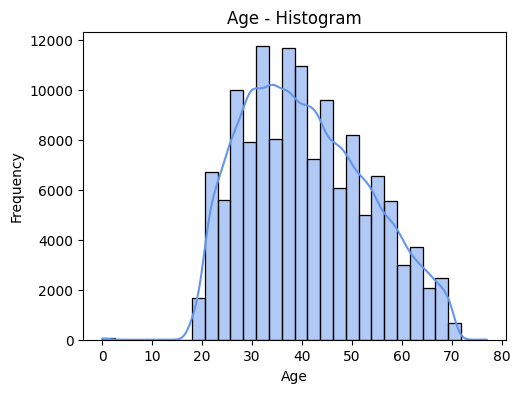

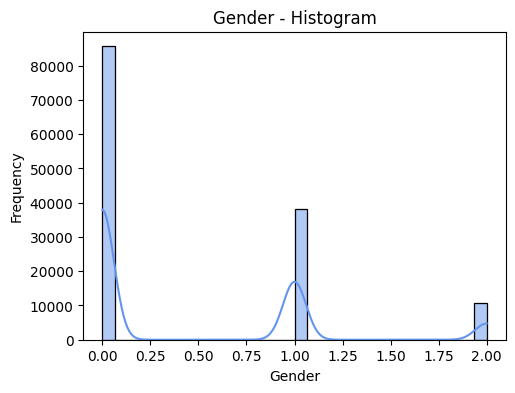

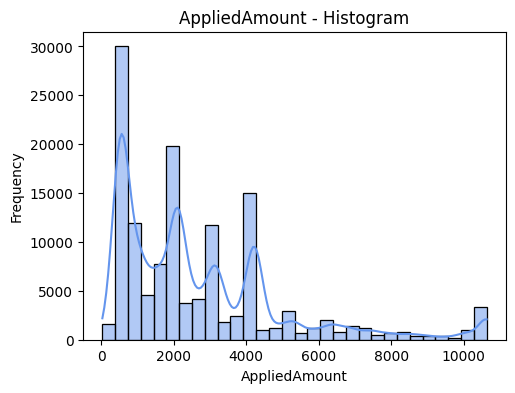

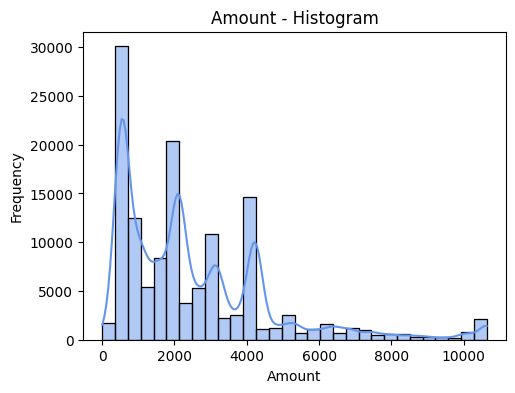

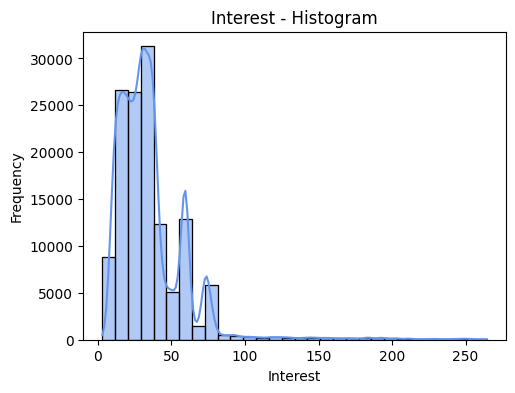

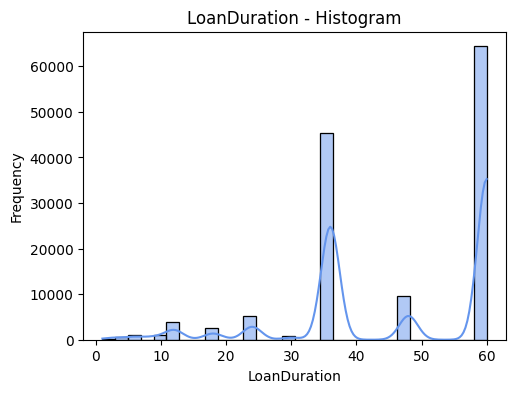

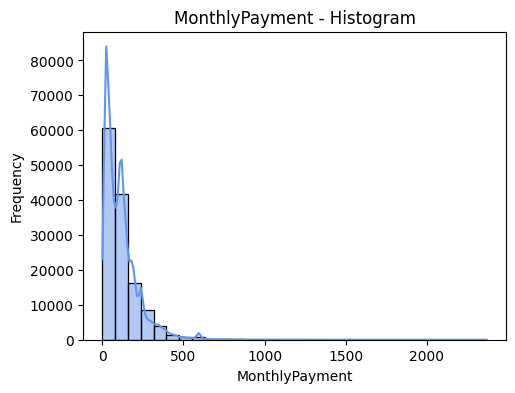

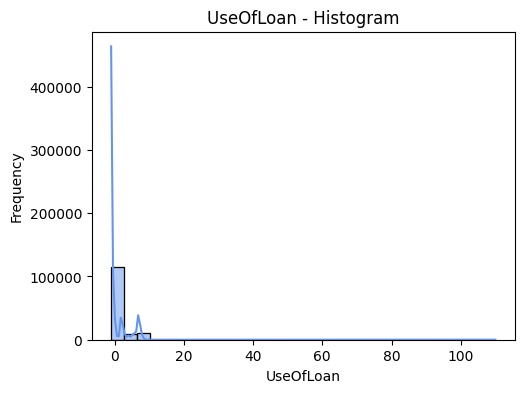

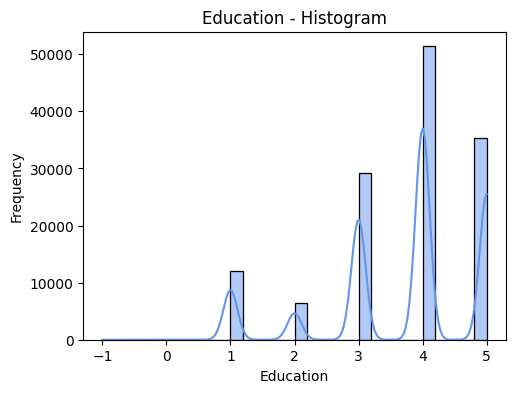

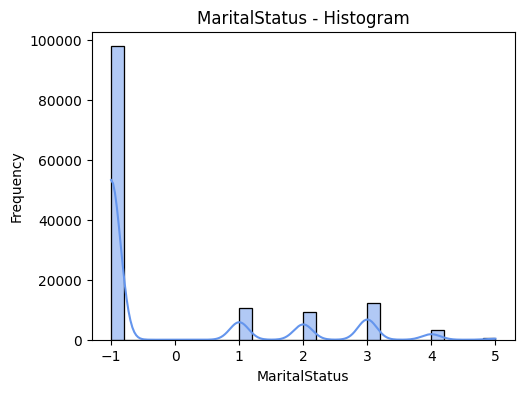

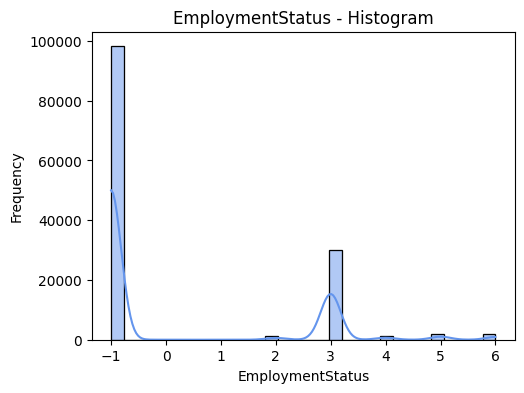

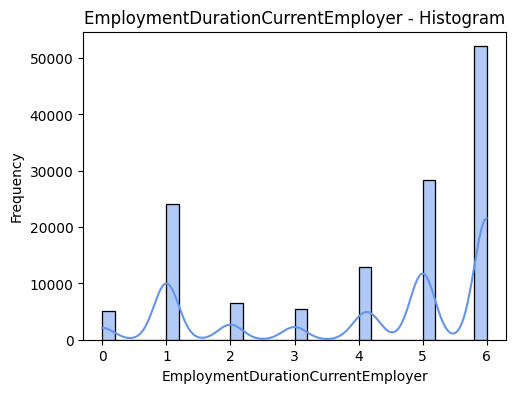

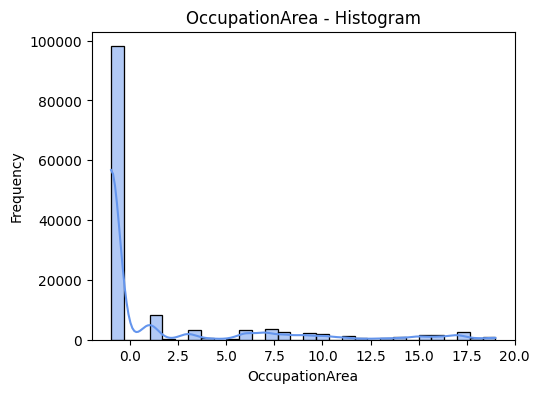

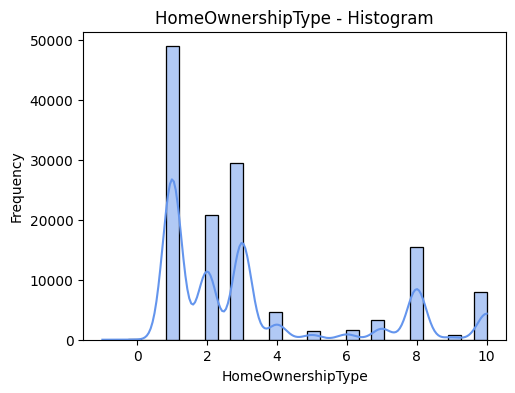

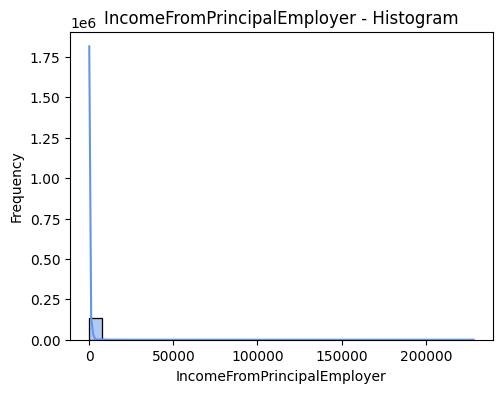

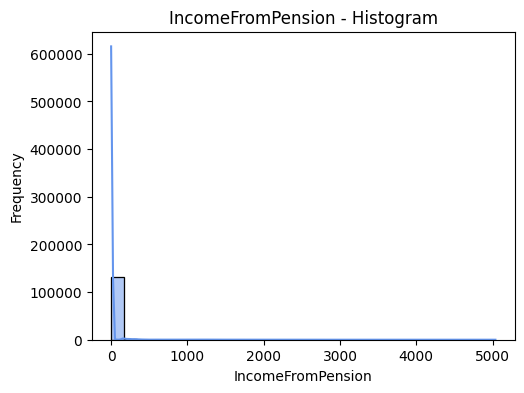

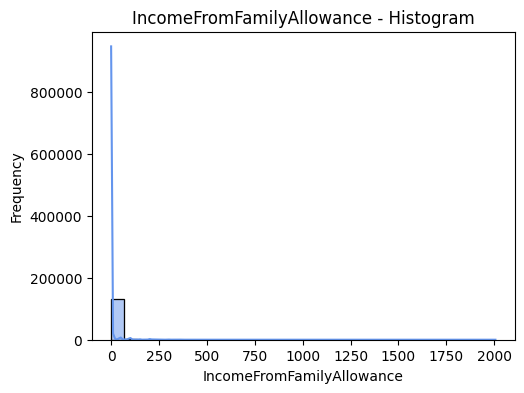

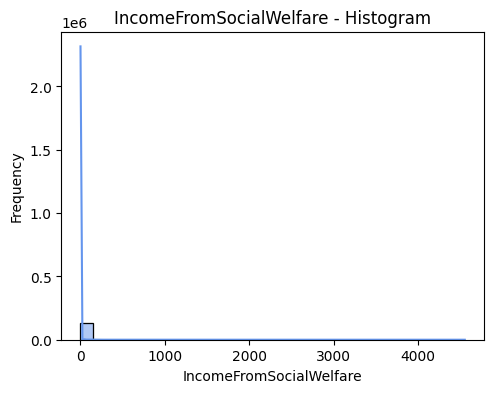

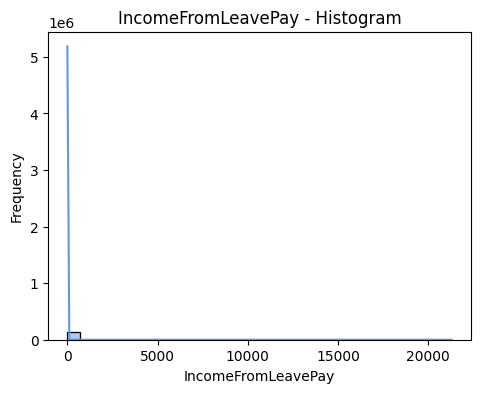

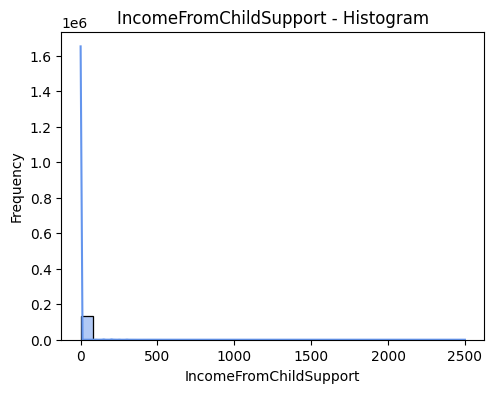

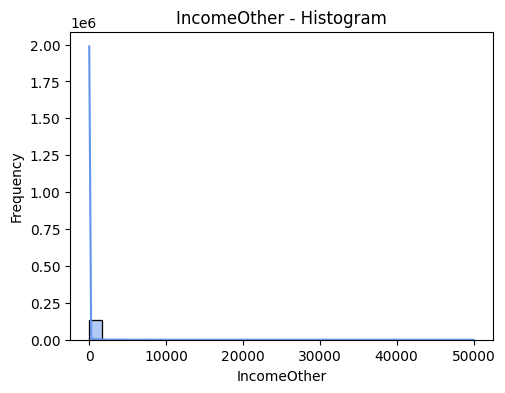

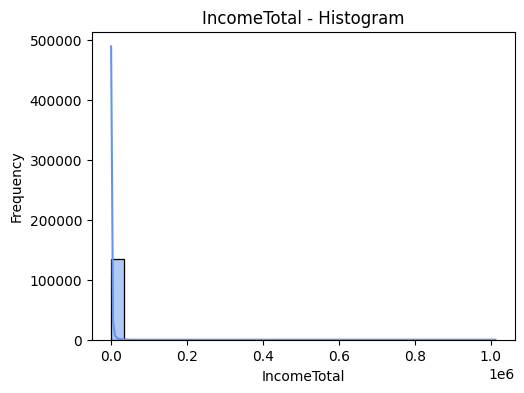

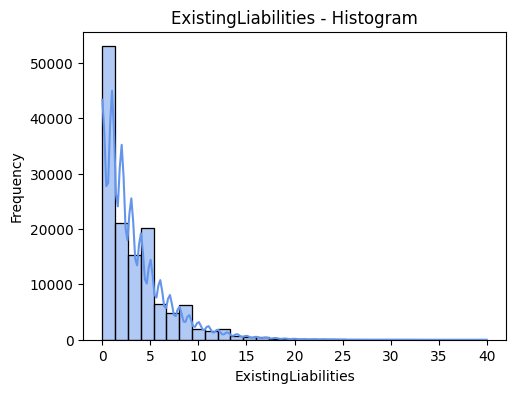

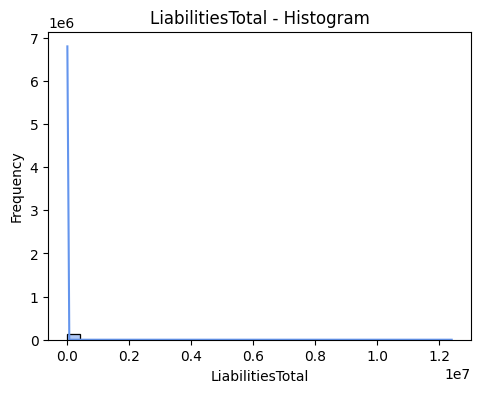

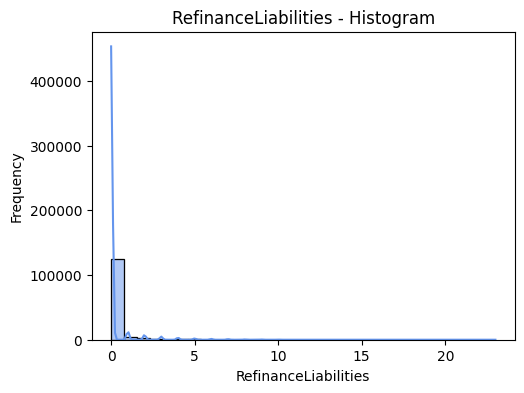

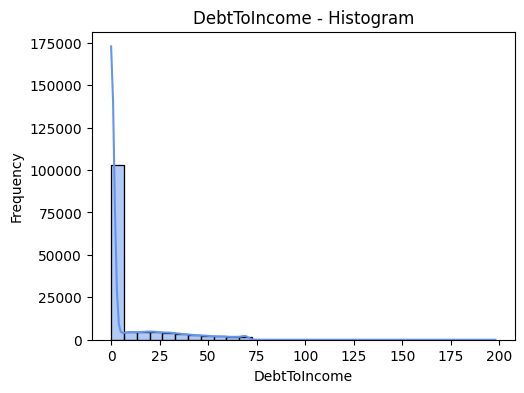

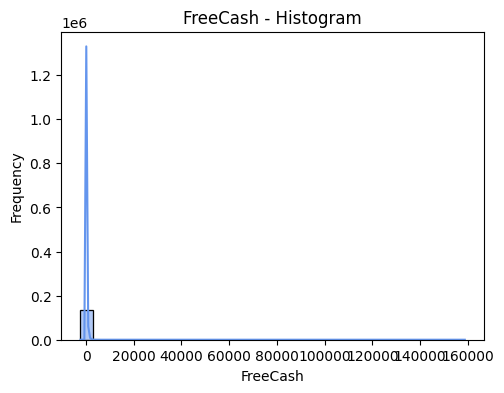

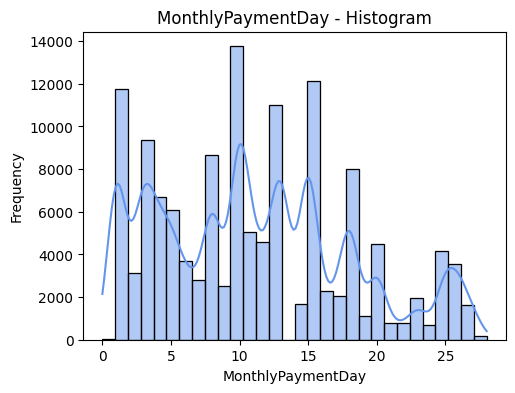

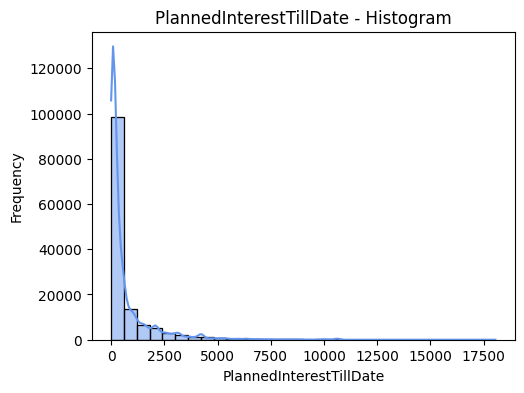

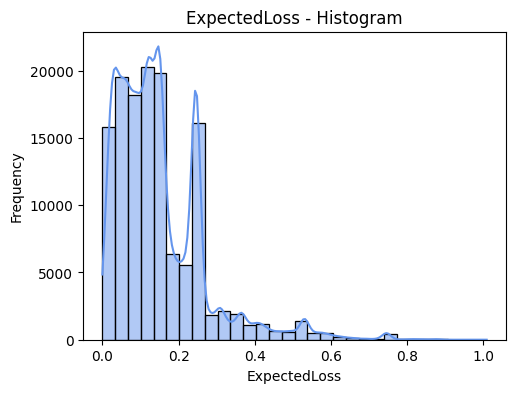

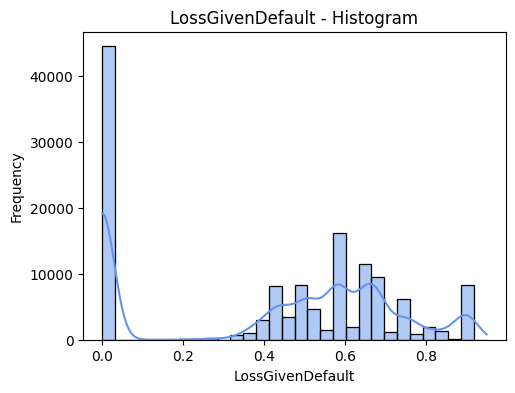

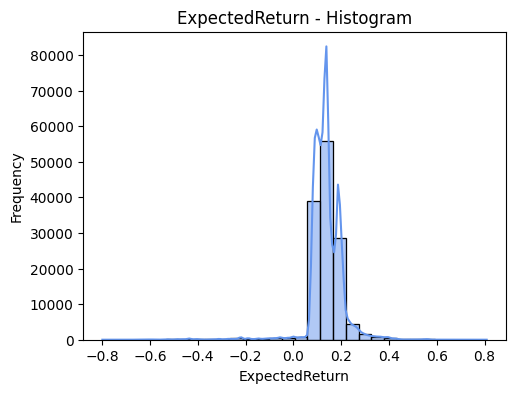

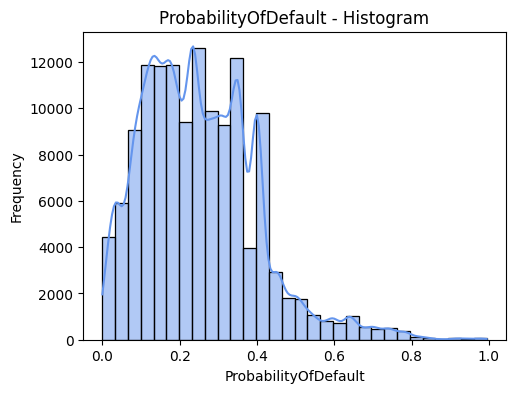

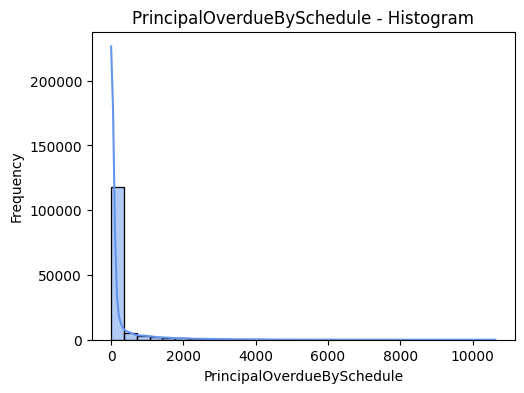

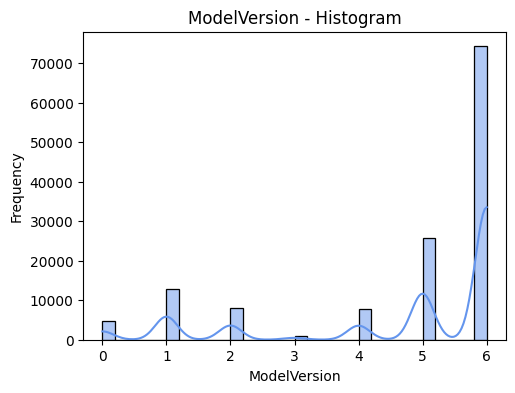

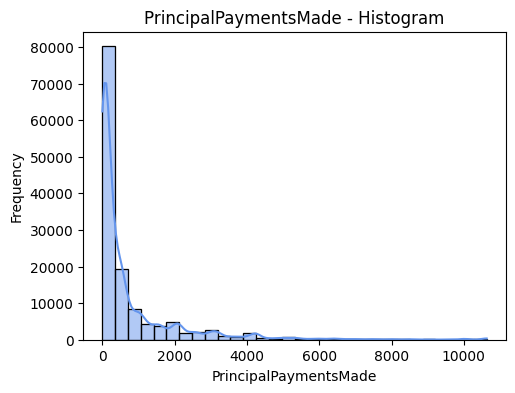

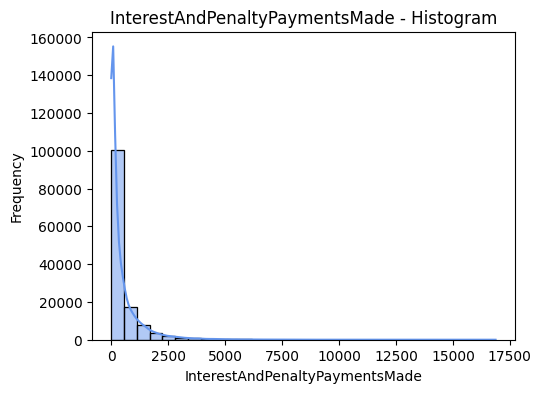

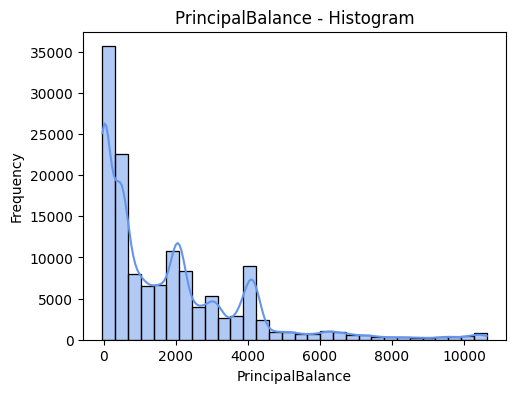

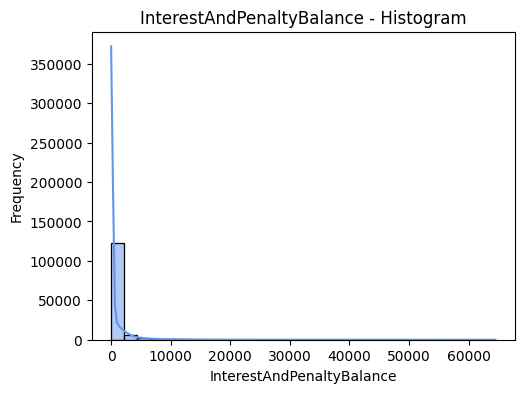

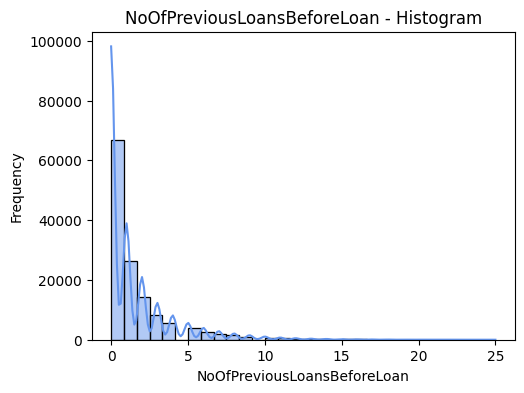

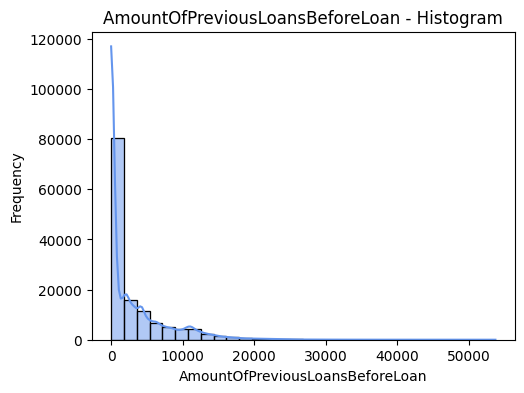

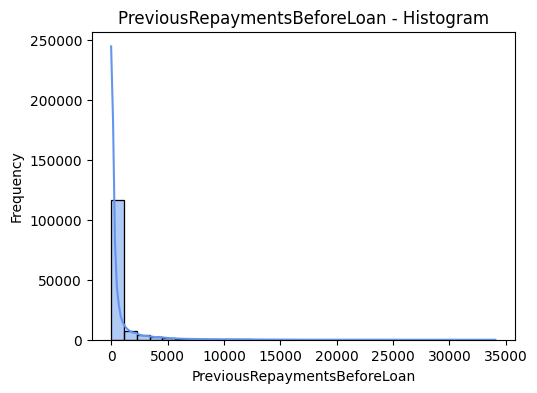

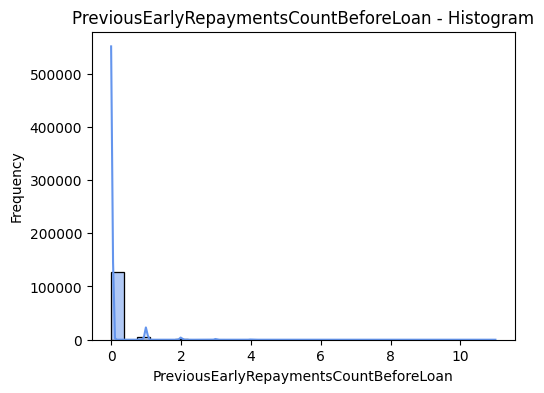

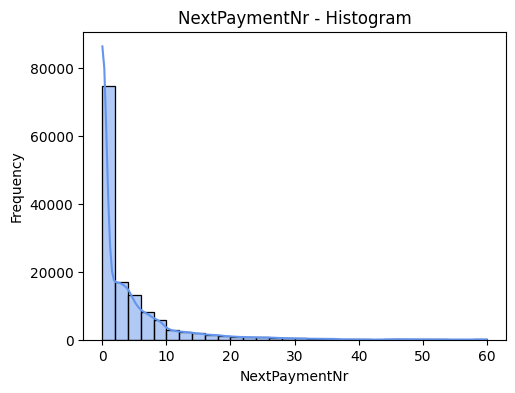

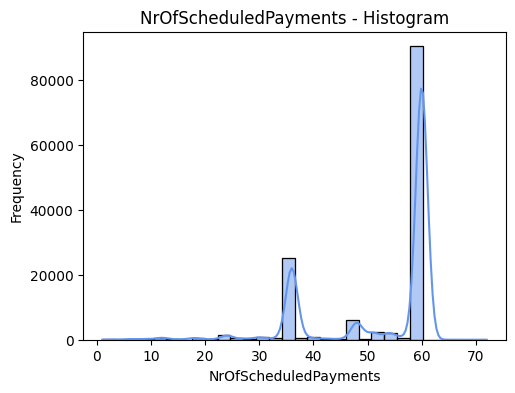

In [ ]:
#sns.set(style="whitegrid")

# Detect numeric and categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Exclude 'LoanEligibility' from numeric columns
numeric_cols = [col for col in numeric_cols if col != 'LoanEligibility']

# ----------- Univariate Analysis for Numerical Columns -----------
for col in numeric_cols:
    print(f"\n📊 Numerical Column: {col}")
    print(df[col].describe())  # Descriptive statistics

    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='cornflowerblue')
    plt.title(f'{col} - Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')




📊 Value Counts for 'BidsPortfolioManager':
BidsPortfolioManager
0       4535
525      928
500      890
1000     702
3000     635
        ... 
3576       1
4631       1
4692       1
5026       1
4274       1
Name: count, Length: 5730, dtype: int64
⚠️ Skipping plot for 'BidsPortfolioManager' (too many unique values: 5730)

📊 Value Counts for 'BidsApi':
BidsApi
0       85209
5        5653
1        4857
10       3594
2        3217
        ...  
2725        1
2805        1
3255        1
1770        1
1690        1
Name: count, Length: 1002, dtype: int64
⚠️ Skipping plot for 'BidsApi' (too many unique values: 1002)

📊 Value Counts for 'BidsManual':
BidsManual
5.0       9538
0.0       9103
1.0       2391
2.0       1027
3.0        754
          ... 
5025.0       1
8705.0       1
3226.0       1
3349.0       1
3454.0       1
Name: count, Length: 4308, dtype: int64
⚠️ Skipping plot for 'BidsManual' (too many unique values: 4308)

📊 Value Counts for 'NewCreditCustomer':
NewCreditCustomer
True    

/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


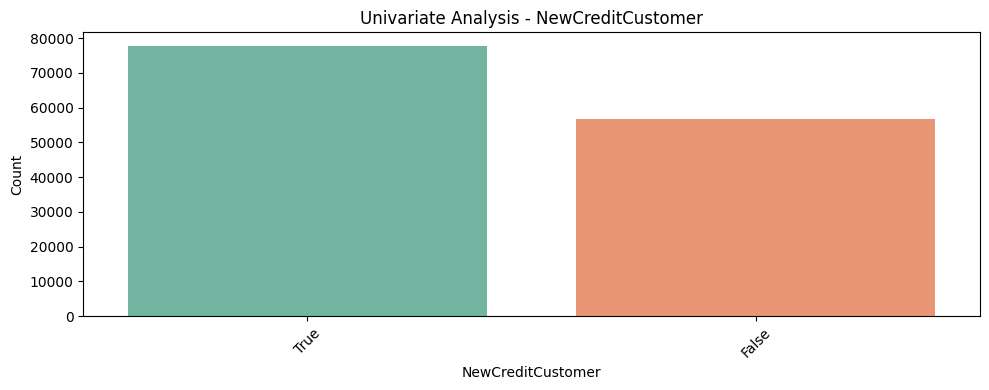


📊 Value Counts for 'VerificationType':
VerificationType
4.0    74617
1.0    48648
3.0     9428
2.0     1828
0.0        8
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


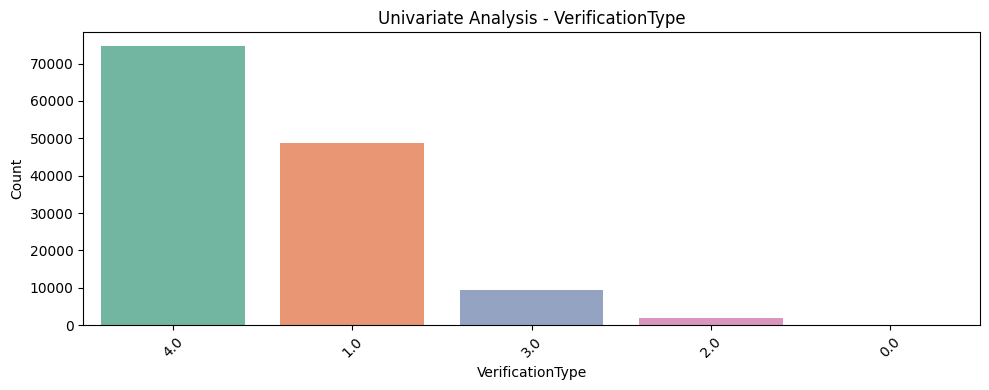


📊 Value Counts for 'LanguageCode':
LanguageCode
1     64299
4     32155
6     24103
3     12694
2       967
9       295
22        6
5         5
15        1
10        1
13        1
7         1
21        1
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


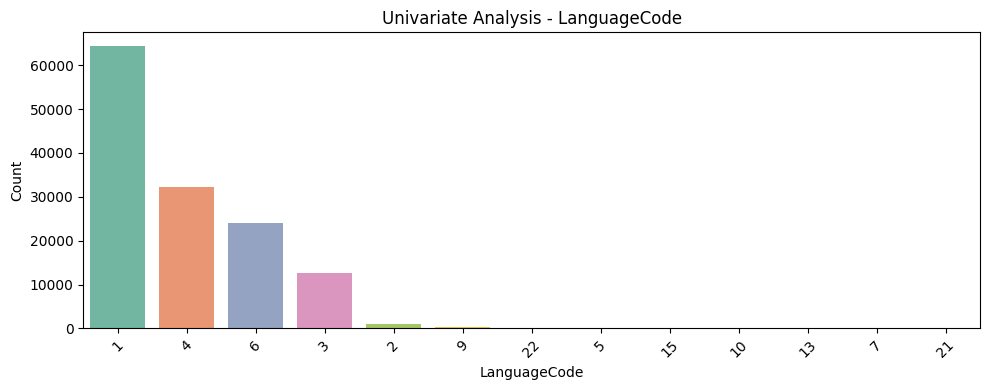


📊 Value Counts for 'Gender':
Gender
0.0    85650
1.0    38213
2.0    10666
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


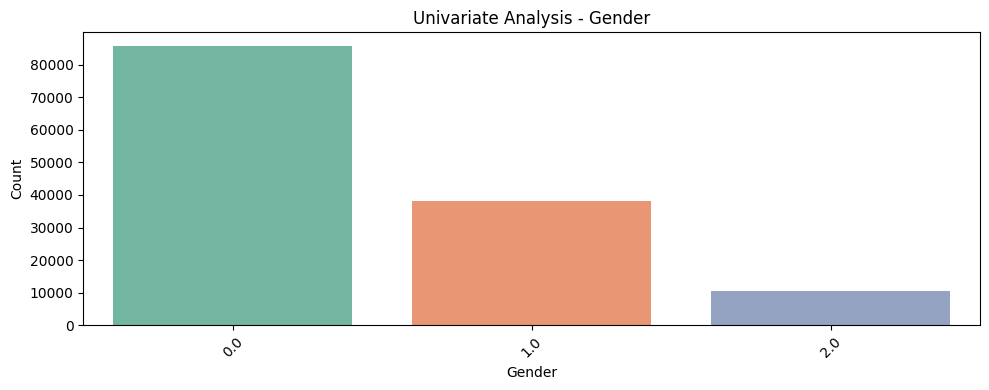


📊 Value Counts for 'Country':
Country
EE    77335
FI    32650
ES    24248
SK      296
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


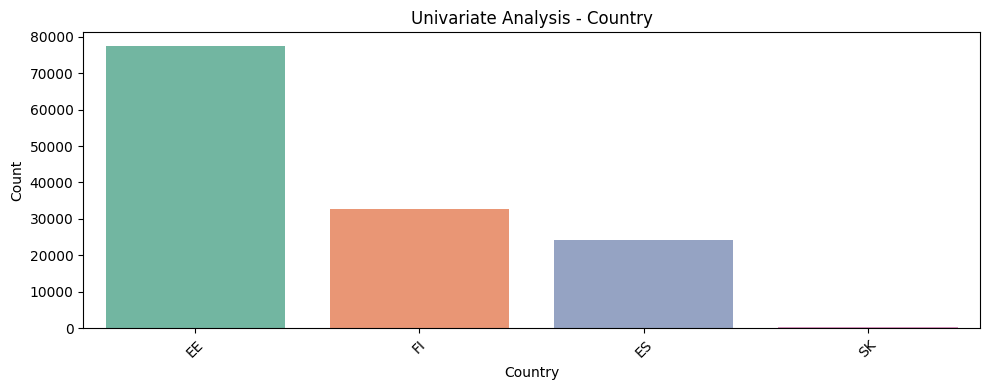


📊 Value Counts for 'County':
County
Harju maakond       59064
HARJU                8108
Tartu maakond        6181
UUSIMAA              6076
Ida-Viru maakond     4197
                    ...  
.                       1
JÕGEVA VALD             1
HARJU MAAKOND           1
PAIDE LINN              1
HIIUMAA                 1
Name: count, Length: 1010, dtype: int64
⚠️ Skipping plot for 'County' (too many unique values: 1010)

📊 Value Counts for 'City':
City
Tallinn                          25398
TALLINN                           6146
Tartu linn                        3326
HELSINKI                          3294
Pärnu linn                        1986
                                 ...  
KANGURISTI                           1
PALMA DE MALLORCA, SANT JORDI        1
VASARA                               1
MATSURI KÜLA, VÄRSKA VALD            1
PÕLGASTE KÜLA                        1
Name: count, Length: 7733, dtype: int64
⚠️ Skipping plot for 'City' (too many unique values: 7733)

📊 Value Counts

/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


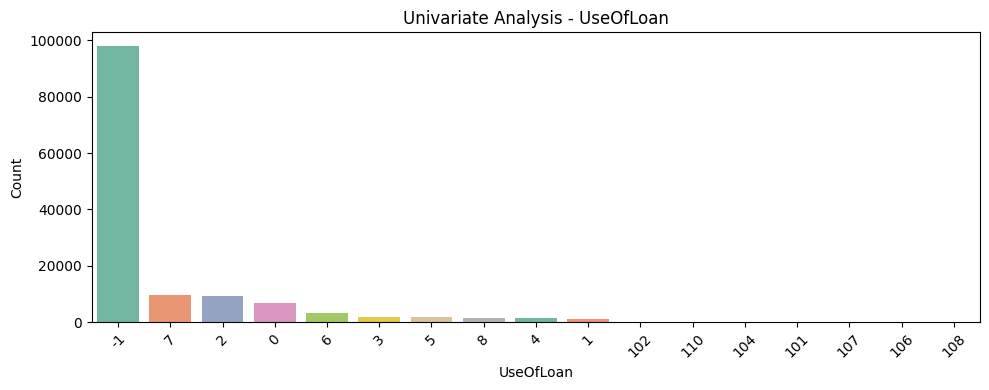


📊 Value Counts for 'Education':
Education
 4.0    51375
 5.0    35398
 3.0    29260
 1.0    12057
 2.0     6427
 0.0        8
-1.0        4
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


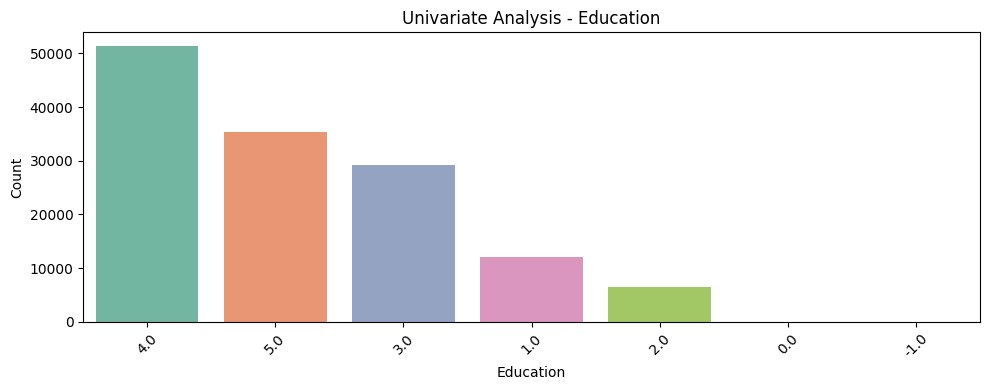


📊 Value Counts for 'MaritalStatus':
MaritalStatus
-1.0    97991
 3.0    12400
 1.0    10752
 2.0     9400
 4.0     3377
 5.0      601
 0.0        8
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


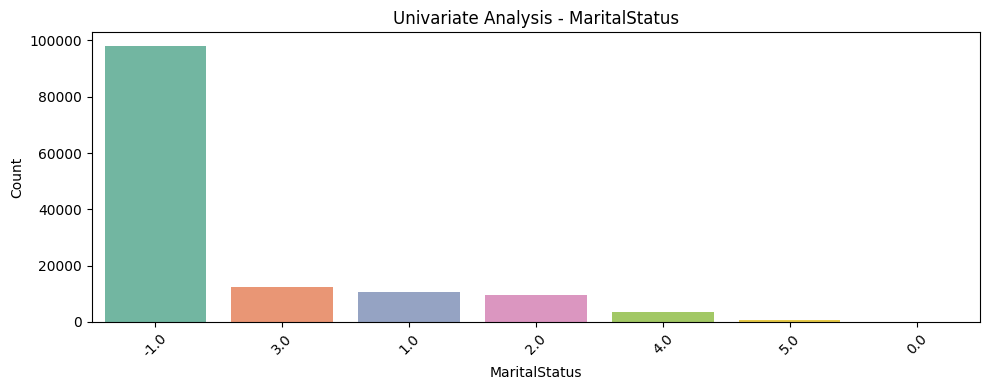


📊 Value Counts for 'EmploymentStatus':
EmploymentStatus
-1.0    98143
 3.0    30060
 5.0     2007
 6.0     1800
 4.0     1303
 2.0     1184
 0.0       32
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


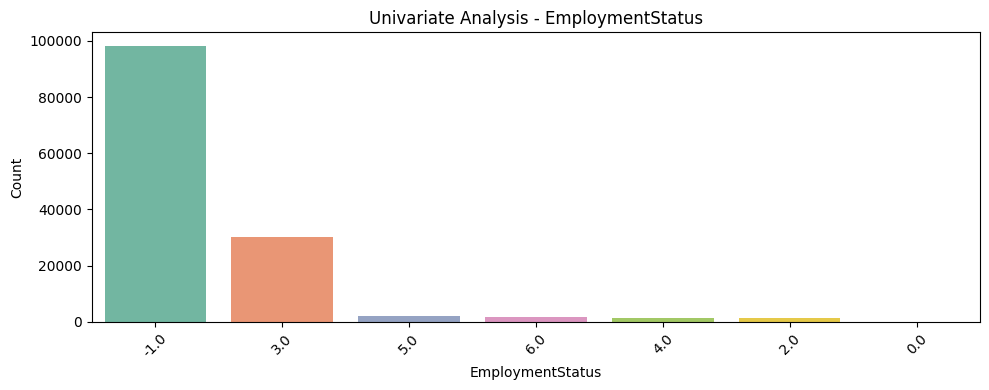


📊 Value Counts for 'EmploymentDurationCurrentEmployer':
EmploymentDurationCurrentEmployer
6.000000    52089
5.000000    28411
1.000000    24187
4.170759     9177
2.000000     6498
3.000000     5435
0.000000     5048
4.000000     3684
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


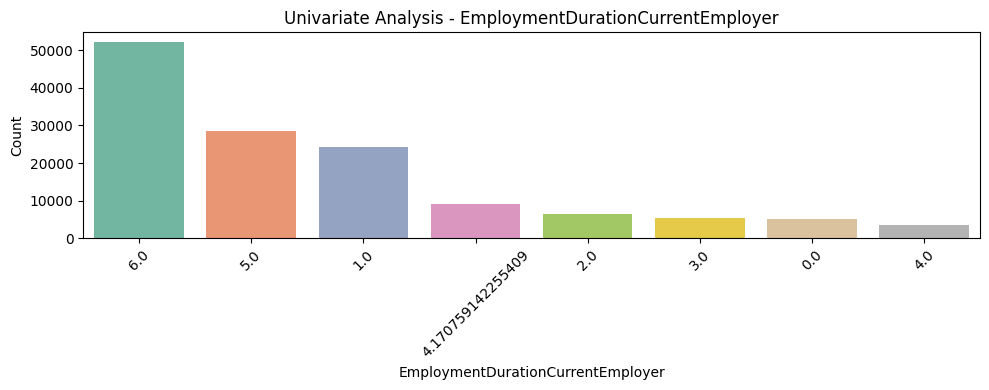


📊 Value Counts for 'OccupationArea':
OccupationArea
-1.0     98083
 1.0      8421
 7.0      3587
 6.0      3312
 3.0      3198
 8.0      2462
 17.0     2424
 9.0      2262
 10.0     1933
 15.0     1684
 16.0     1430
 11.0     1148
 19.0     1000
 14.0      843
 18.0      619
 4.0       587
 13.0      564
 12.0      477
 5.0       362
 2.0       122
 0.0        11
Name: count, dtype: int64
⚠️ Skipping plot for 'OccupationArea' (too many unique values: 21)

📊 Value Counts for 'HomeOwnershipType':
HomeOwnershipType
 1.0     48986
 3.0     29579
 2.0     20780
 8.0     15457
 10.0     7956
 4.0      4582
 7.0      3337
 6.0      1618
 5.0      1442
 9.0       743
 0.0        46
-1.0         3
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


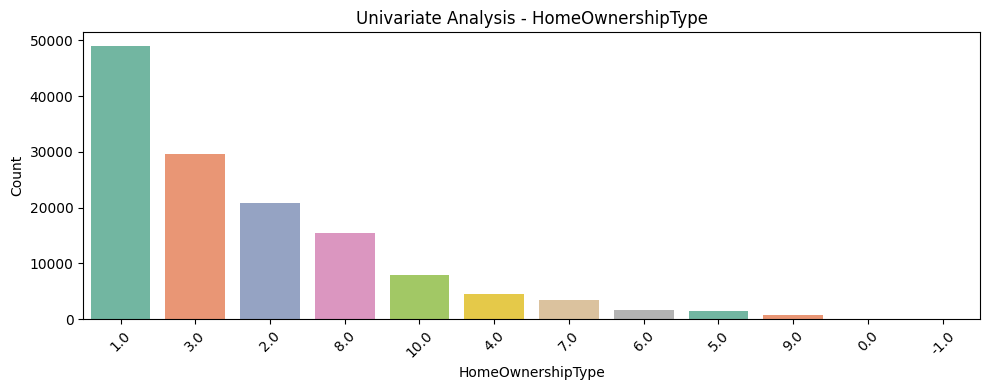


📊 Value Counts for 'MonthlyPaymentDay':
MonthlyPaymentDay
10    13754
15    12137
1     11759
13    10991
3      9371
8      8639
18     8014
4      6709
5      6094
11     5041
12     4585
20     4470
25     4173
6      3697
26     3541
2      3137
7      2787
9      2508
16     2282
17     2058
23     1957
14     1685
27     1629
19     1097
22      796
21      782
24      667
28      157
0        12
Name: count, dtype: int64
⚠️ Skipping plot for 'MonthlyPaymentDay' (too many unique values: 29)

📊 Value Counts for 'ActiveScheduleFirstPaymentReached':
ActiveScheduleFirstPaymentReached
True     127484
False      7045
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


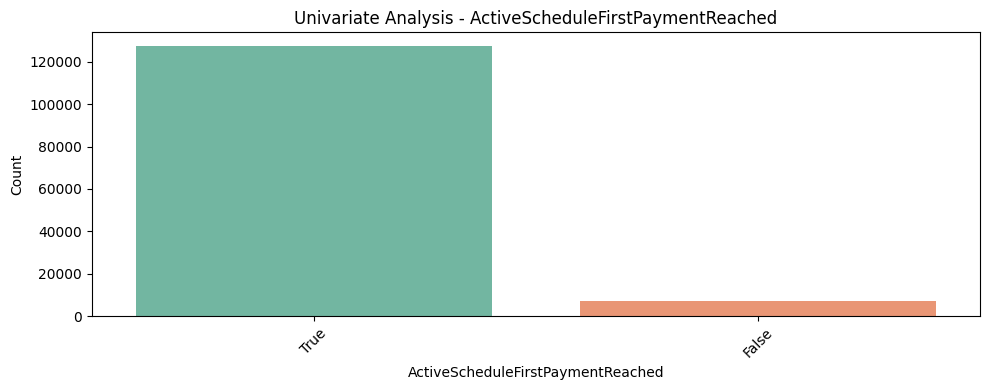


📊 Value Counts for 'ModelVersion':
ModelVersion
6.0    74276
5.0    25822
1.0    12922
2.0     7946
4.0     7861
0.0     4663
3.0     1039
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


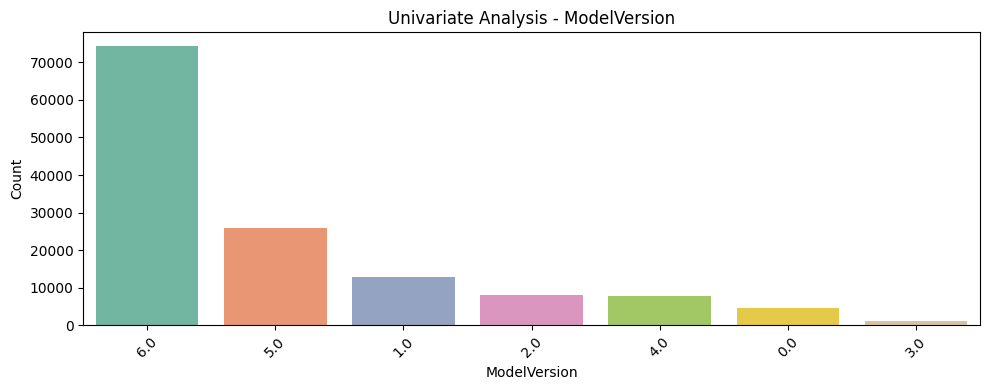


📊 Value Counts for 'Rating':
Rating
E     27191
F     24161
D     21558
C     19845
B     14636
HR    14122
A      6905
AA     6111
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


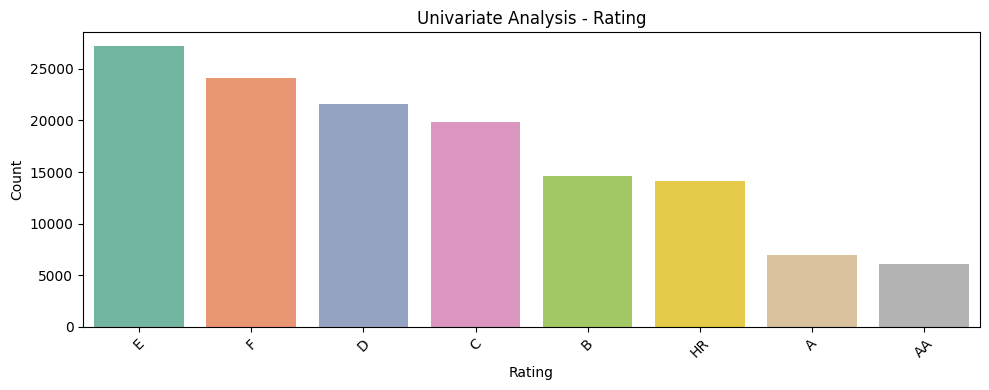


📊 Value Counts for 'Status':
Status
Current    57135
Late       45772
Repaid     31622
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


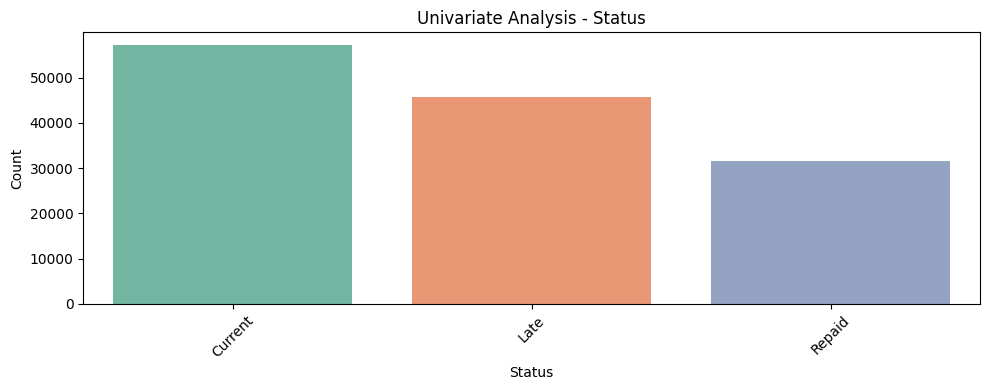


📊 Value Counts for 'Restructured':
Restructured
False    106900
True      27629
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


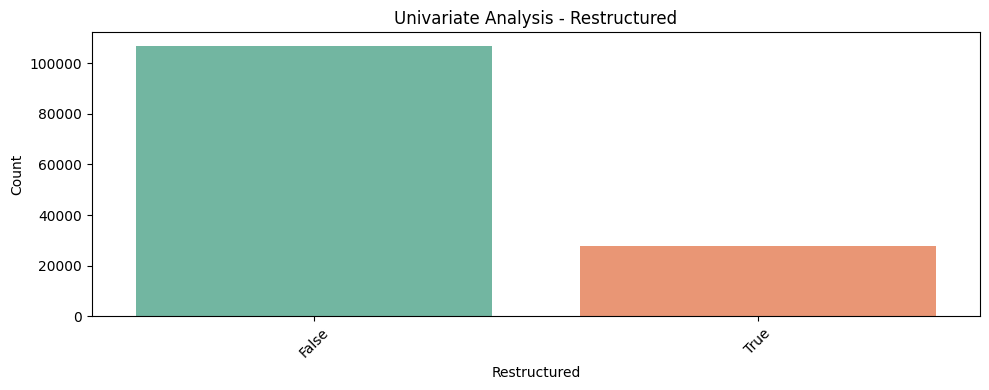


📊 Value Counts for 'LoanEligibility':
LoanEligibility
1    80479
0    54050
Name: count, dtype: int64


/tmp/ipython-input-47-279855868.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


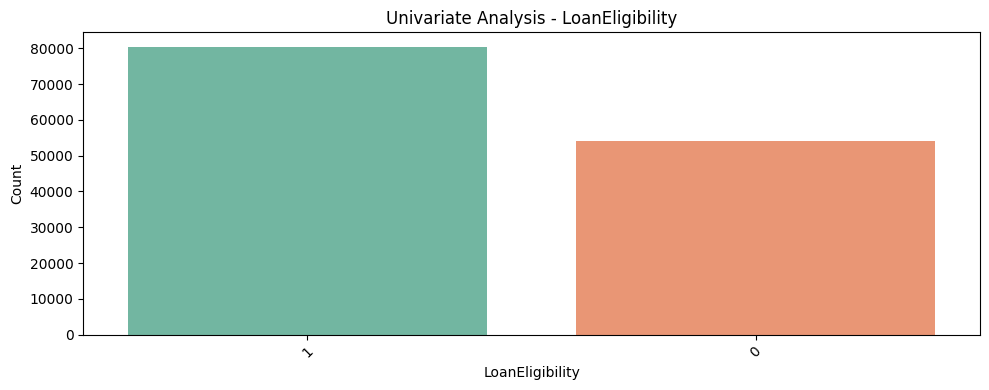

In [ ]:
# Define the list of categorical columns (from your list)
categorical_cols = [
    'BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
    'VerificationType', 'LanguageCode', 'Gender', 'Country', 'County', 'City',
    'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
    'EmploymentDurationCurrentEmployer', 'OccupationArea', 'HomeOwnershipType',
    'MonthlyPaymentDay', 'ActiveScheduleFirstPaymentReached',
    'ModelVersion', 'Rating', 'Status', 'Restructured', 'LoanEligibility'
]

# Loop through each categorical column
for col in categorical_cols:
    if col in df.columns:
        print(f"\n📊 Value Counts for '{col}':")
        print(df[col].value_counts(dropna=False))  # Show frequency table

        # Plot only if unique values are within readable limit
        if df[col].nunique() <= 20:
            plt.figure(figsize=(10, 4))
            sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
            plt.title(f'Univariate Analysis - {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print(f"⚠️ Skipping plot for '{col}' (too many unique values: {df[col].nunique()})")
    else:
        print(f"❌ Column '{col}' not found in the DataFrame.")

## Bivariate Analysis

In [ ]:


# Set seaborn style
sns.set(style="whitegrid")

# Select numeric columns and exclude 'LoanEligibility'
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = [col for col in numeric_cols if col != 'LoanEligibility']

# ----------- Pairwise Scatter Plots (Pairplot) -----------
sample_df = df[numeric_cols].sample(n=500, random_state=42) if df.shape[0] > 500 else df[numeric_cols]

sns.pairplot(sample_df)
plt.suptitle("Pairwise Scatter Plots of Numerical Features", y=1.02)
plt.show()


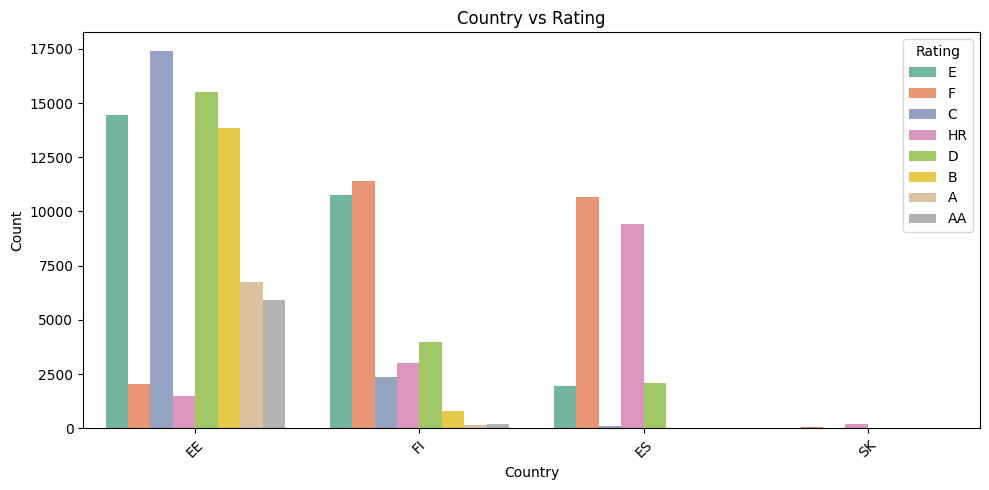

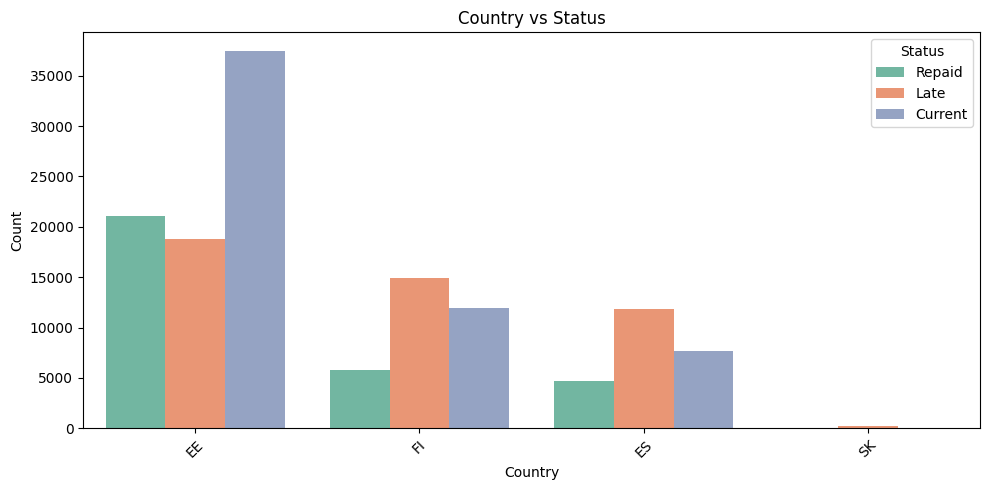

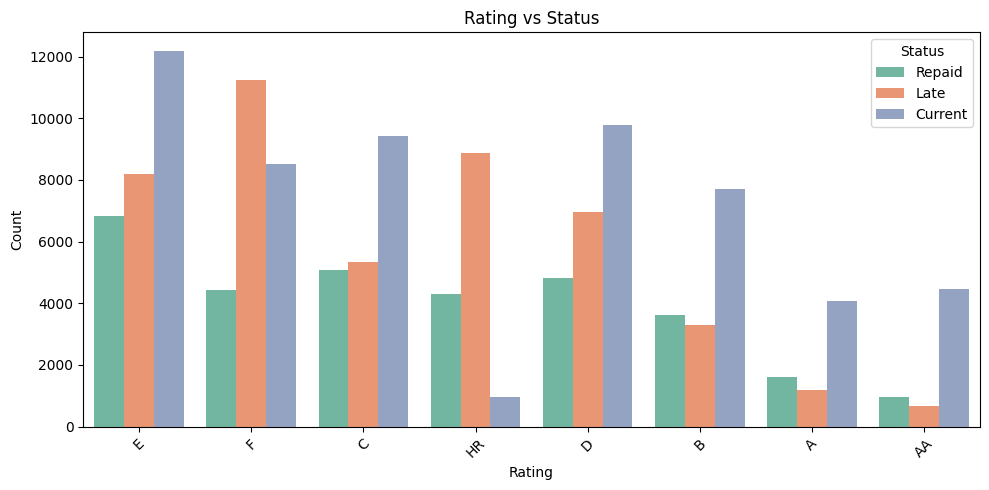

In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Drop high-cardinality or identifier/date columns (optional step)
drop_cols = ['UserName', 'City', 'County', 'LoanId', 'LoanNumber', 'LoanDate',
             'DateOfBirth', 'LoanApplicationStartedDate', 'ReportAsOfEOD',
             'ListedOnUTC', 'FirstPaymentDate', 'MaturityDate_Original',
             'MaturityDate_Last', 'LastPaymentOn']
filtered_cats = [col for col in categorical_cols if col not in drop_cols and df[col].nunique() <= 10]

# Loop through combinations of categorical features
for i in range(len(filtered_cats)):
    for j in range(i + 1, len(filtered_cats)):
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=filtered_cats[i], hue=filtered_cats[j], palette='Set2')
        plt.title(f'{filtered_cats[i]} vs {filtered_cats[j]}')
        plt.xlabel(filtered_cats[i])
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


## Multivariate Analysis

In [ ]:
df

ReportAsOfEOD                                LoanId  LoanNumber  \
0         2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1         2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2         2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3         2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4         2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   
...              ...                                   ...         ...   
134524    2020-01-27  A9C9EF0F-4E79-4930-BA8A-A4130077FCC2      283484   
134525    2020-01-27  787345C2-7606-4F72-8FE2-A4170082D77C      285168   
134526    2020-01-27  E2D3384D-289A-4B4D-A2DA-A40F00F7C755      281602   
134527    2020-01-27  7CC7AB74-995B-4467-958A-A41700F78D59      285431   
134528    2020-01-27  3A0DEBF3-292C-4EB4-B71A-A4170157749D      285630   

                ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0       2009-06-11 16:40:39  2009-06-11 16:40:39                     0   
1       2009-06-10 15:48:57  2009-06-10 15:48:57                     0   
2       2009-06-05 19:12:29  2009-06-05 19:12:29                     0   
3       2009-06-13 12:01:20  2009-06-13 12:01:20                     0   
4       2009-06-10 10:17:13  2009-06-10 10:17:13                     0   
...                     ...                  ...                   ...   
134524  2015-01-02 16:31:36  2015-01-02 16:31:36                  2515   
134525  2015-01-05 16:14:26  2015-01-05 16:14:26                  1880   
134526  2015-01-02 14:04:27  2015-01-02 14:04:27                  1975   
134527  2015-01-05 16:56:12  2015-01-05 16:56:12                  1840   
134528  2015-01-06 11:07:06  2015-01-06 11:07:06                  2990   

        BidsApi  BidsManual   UserName  NewCreditCustomer  \
0             0    115.0410       KARU               True   
1             0    140.6057   koort681              False   
2             0    319.5580        0ie               True   
3             0     57.5205     Alyona               True   
4             0    319.5582        Kai               True   
...         ...         ...        ...                ...   
134524        0    485.0000  BO73K5A6A               True   
134525        0   1120.0000   BO311A49              False   
134526        0    525.0000  BO41K639A               True   
134527        0   1160.0000   BO45A925              False   
134528        0     10.0000  BO152923A              False   

       LoanApplicationStartedDate    LoanDate FirstPaymentDate  \
0             2009-06-11 16:40:39  2009-06-16       2009-07-27   
1             2009-06-10 15:48:57  2009-06-15       2009-07-15   
2             2009-06-05 19:12:29  2009-06-15       2009-07-27   
3             2009-06-13 12:01:20  2009-06-15       2009-07-15   
4             2009-06-10 10:17:13  2009-06-14       2009-07-27   
...                           ...         ...              ...   
134524        2015-01-01 07:17:03  2015-01-06       2015-03-02   
134525        2015-01-05 07:56:22  2015-01-06       2015-03-05   
134526        2014-12-28 15:01:47  2015-01-06       2015-03-02   
134527        2015-01-05 15:01:18  2015-01-06       2015-03-02   
134528        2015-01-05 20:50:24  2015-01-06       2015-03-03   

       MaturityDate_Original MaturityDate_Last  ApplicationSignedHour  \
0                 2010-06-25        2010-06-25                     17   
1                 2009-07-15        2009-07-15                     20   
2                 2011-02-25        2014-05-13                     20   
3                 2010-09-15        2010-09-15                     12   
4                 2010-06-25        2010-06-25                     10   
...                      ...               ...                    ...   
134524            2020-02-03        2020-02-03                     16   
134525            2020-02-05        2019-02-20                     16   
134526            2020-02-03        2020-02-03

In [ ]:
# Step 1: Select numerical columns excluding LoanEligibility
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'LoanEligibility']
# Sampling to reduce visual clutter (if dataset is large)
sample_df = df.sample(n=500, random_state=42) if df.shape[0] > 500 else df

sns.pairplot(sample_df[numeric_cols + ['LoanEligibility']], hue='LoanEligibility', palette='Set2', diag_kind='kde')
plt.suptitle("🔍 Pairwise Multivariate Analysis of Numerical Columns", y=1.02)
plt.show()

#FEATURE ENGINEERING

* Data Encoding
* Handling Outliers
* Checking for correlation
* Data Scaling
* Checking for multicollinearity
* Feature Extraction and Removal

## Data Encoding

* Label Encoding
* Target Encoding
* Onehot Encoding
* Ordinal Encoding
* Binary Encoding

 **Data Encoding**  _ Data encoding is the process of converting data into a specific format or representation for efficient storage, transmission, or processing. It ensures that data is understood correctly by machines or systems, especially when the original format isn't suitable or optimal for these tasks.


*   **Label Encoding** _ Assigns each unique category a unique integer.
*   **Target Encoding** _ Replace each category with the mean of the target variable (e.g., average income per job type).
*   **One-Hot Encoding** _ Converts each category into a binary vector.
*   **Ordinal Encoding** _ Technique used in data preprocessing to convert categorical variables with a clear, meaningful order into numerical values.
*   **Binary Encoding** _ Binary Encoding is a hybrid encoding technique used to convert categorical variables into binary (0s and 1s), especially when the variable has many unique categories.

In [ ]:
#Label Encoding
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

In [ ]:
print(df['County'].nunique())
print(df['County'].unique())
le_county = LabelEncoder()
df['County'] = le_county.fit_transform(df['County'])

1010
['HARJU' 'IDA-VIRU' 'PÄRNU' ... 'ÖSTNYLAND' 'HANKO' 'POHJOIS-POHJOINMAA']


In [ ]:
print(df['City'].nunique())
le_city = LabelEncoder()
df['City'] = le_city.fit_transform(df['City'].astype(str))

7733


In [ ]:
print(df['CreditScoreEsMicroL'].dtype)
print(df['CreditScoreEsMicroL'].unique())
le_credit = LabelEncoder()
df['CreditScoreEsMicroL'] = le_credit.fit_transform(df['CreditScoreEsMicroL'].astype(str))

object
['M' 'M3' 'M5' 'M1' 'M9' 'M2' 'M6' 'M4' 'M8' 'M7' 'M10']


In [ ]:
print(df['Status'].unique())
le_status = LabelEncoder()
df['Status'] = le_status.fit_transform(df['Status'].astype(str))

['Repaid' 'Late' 'Current']


In [ ]:
# Ordinal Encoding
print(df['Rating'].unique())
rating_order = {
    'AA': 0,
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'HR': 7  # HR = High Risk
}
df['Rating'] = df['Rating'].map(rating_order)


['E' 'F' 'C' 'HR' 'D' 'B' 'A' 'AA']


In [ ]:
# Binary Encoding
print(df['Restructured'].unique())
df['Restructured'] = df['Restructured'].astype(int)


[False  True]


In [ ]:
# Binary Encoding
print(df['NewCreditCustomer'].unique())
df['NewCreditCustomer'] = df['NewCreditCustomer'].astype(int)


[ True False]


In [ ]:
# Binary Encoding
print(df['ActiveScheduleFirstPaymentReached'].unique())
df['ActiveScheduleFirstPaymentReached'] = df['ActiveScheduleFirstPaymentReached'].astype(int)


[ True False]


In [ ]:
columns_to_drop = [
    'ReportAsOfEOD', 'LoanId', 'ListedOnUTC', 'BiddingStartedOn',
    'UserName', 'LoanApplicationStartedDate', 'LoanDate',
    'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last',
    'DateOfBirth', 'LastPaymentOn'
]

df.drop(columns=columns_to_drop, inplace=True)


## Handling Outliers

**Outlier Handling** _ Outlier handling refers to the process of detecting and appropriately managing data points that significantly differ from the rest of the dataset. These extreme values—called outliers—can skew statistical analyses, distort model training, and reduce overall accuracy.

In [ ]:
df.columns

Index(['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'NewCreditCustomer', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'County', 'City', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueByS

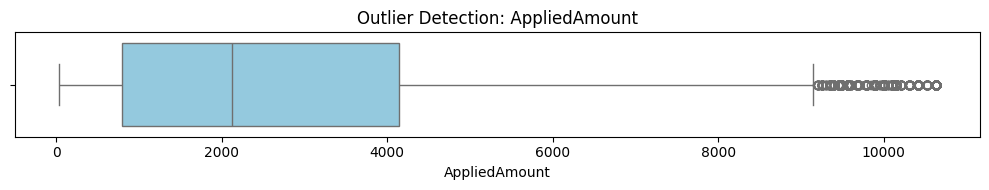

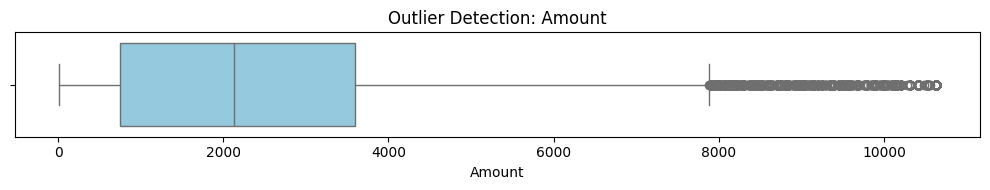

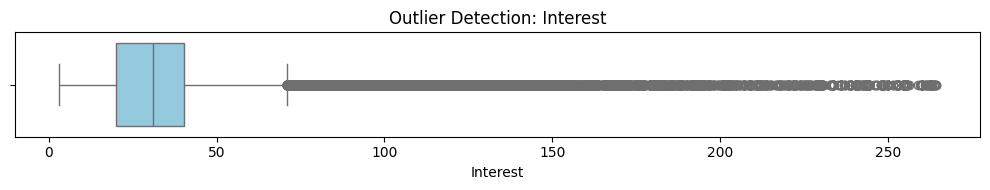

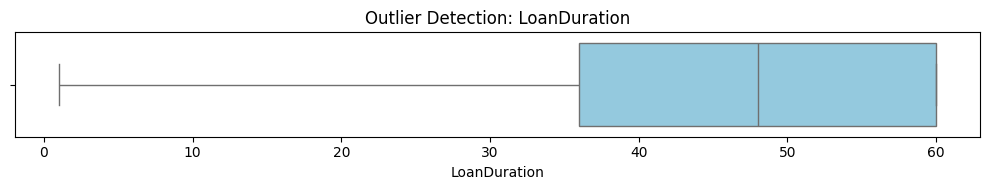

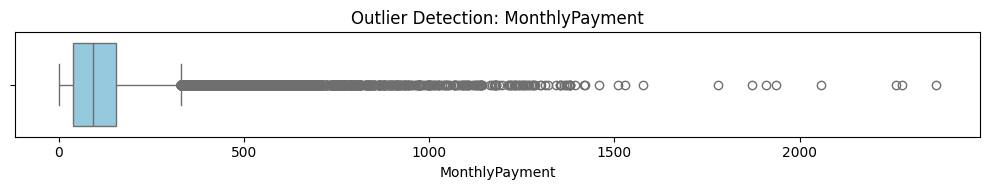

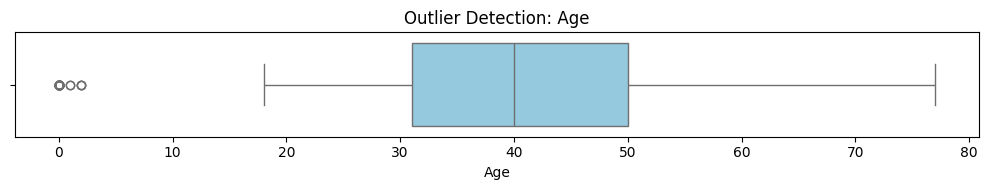

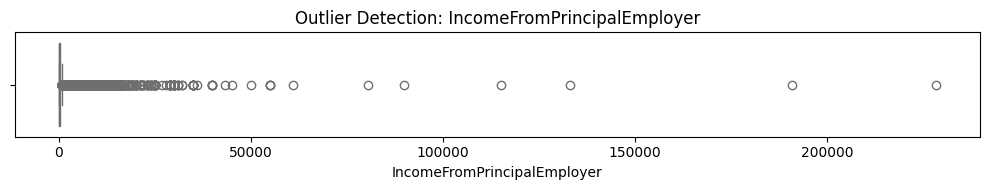

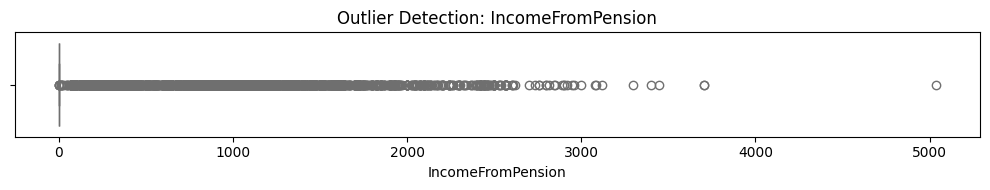

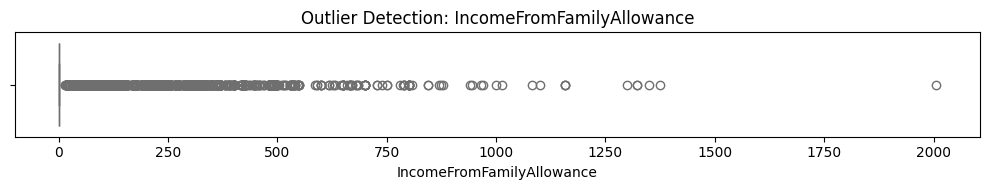

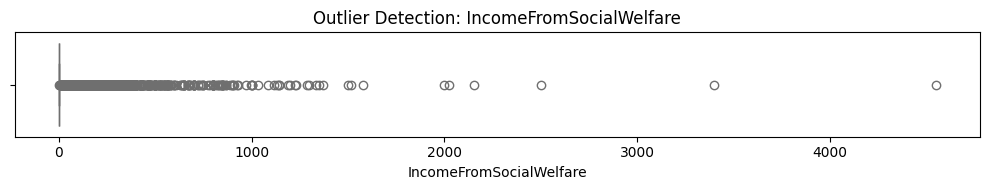

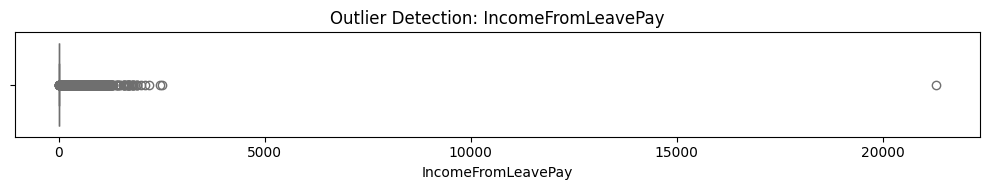

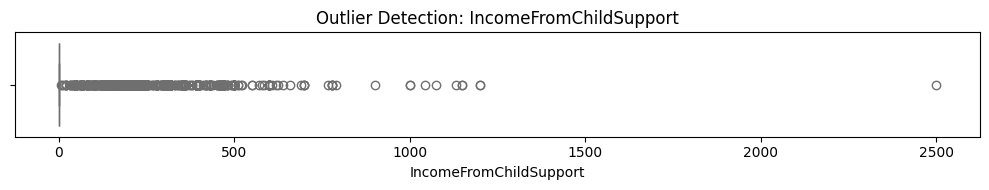

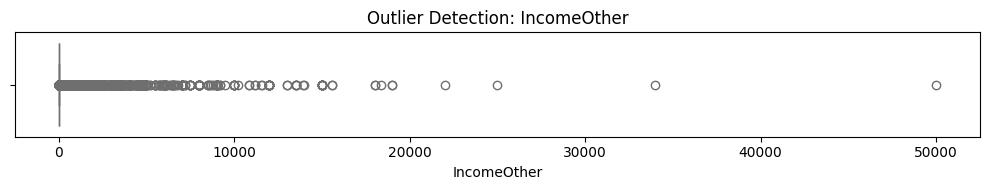

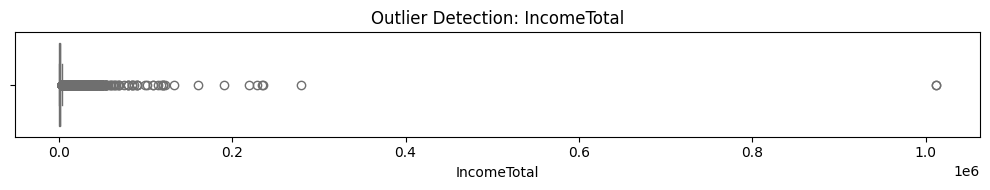

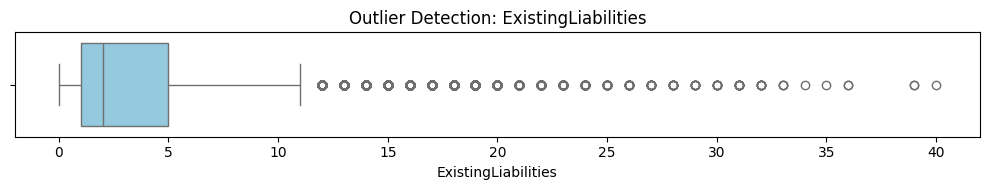

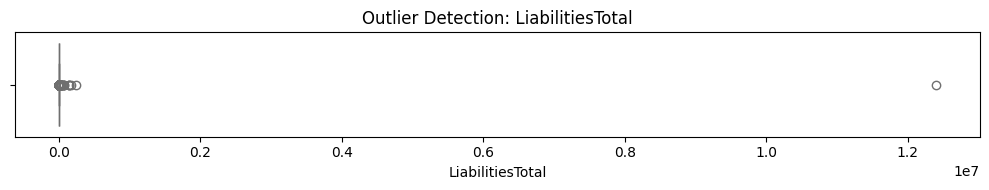

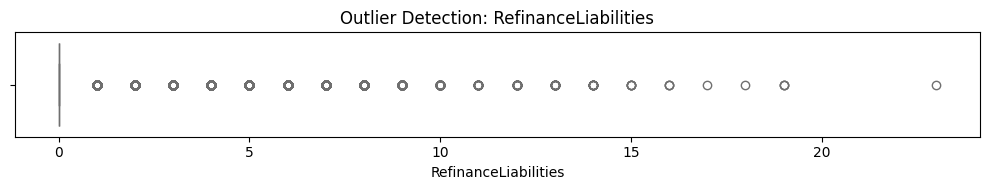

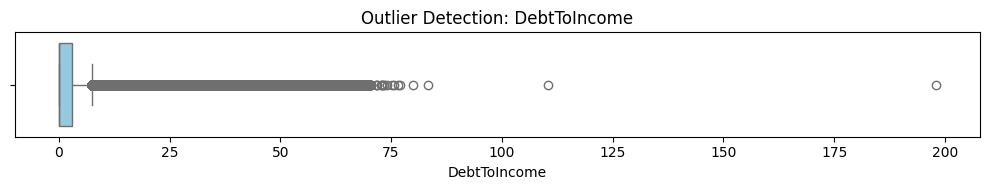

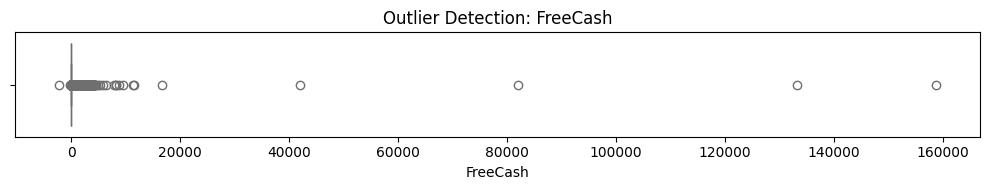

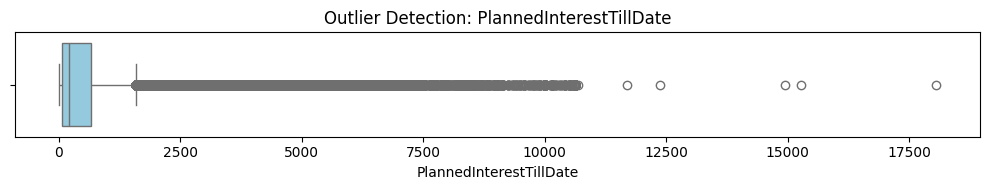

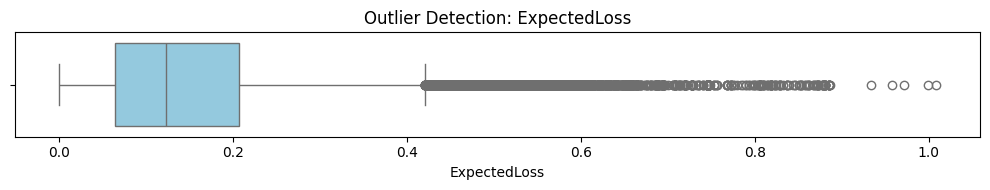

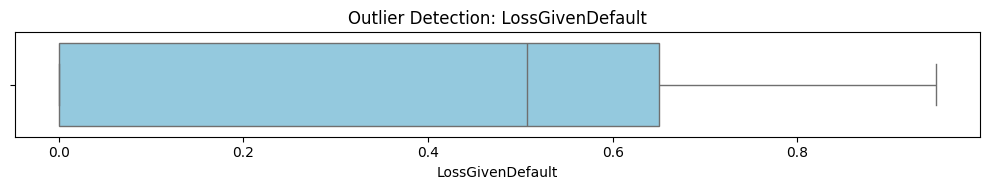

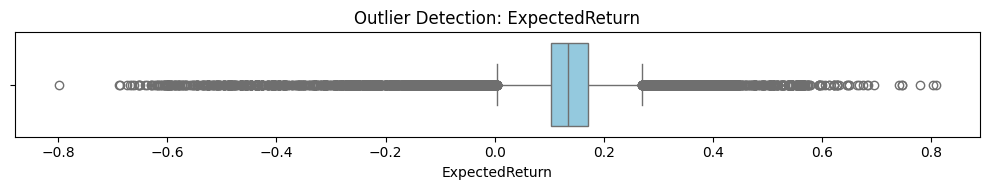

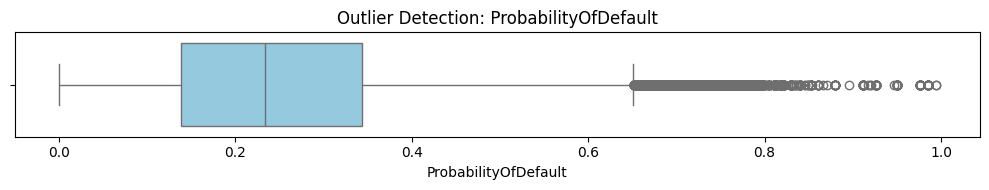

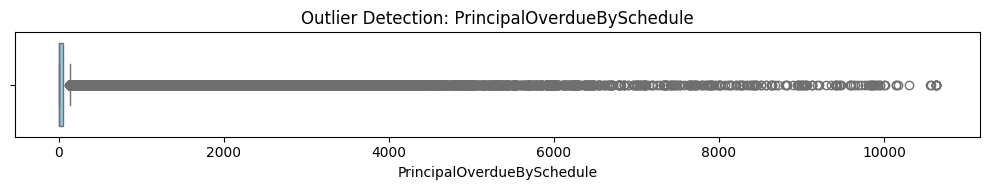

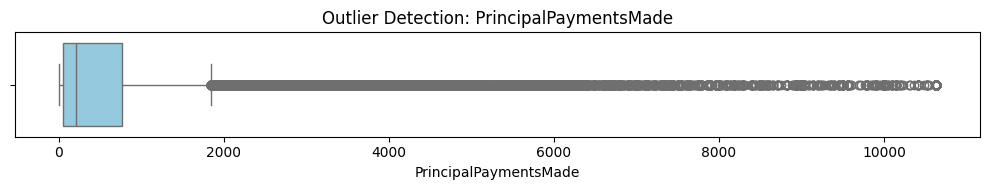

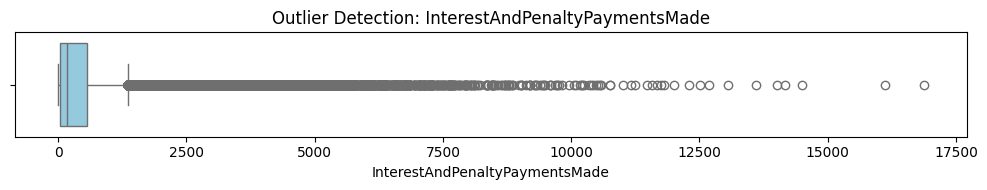

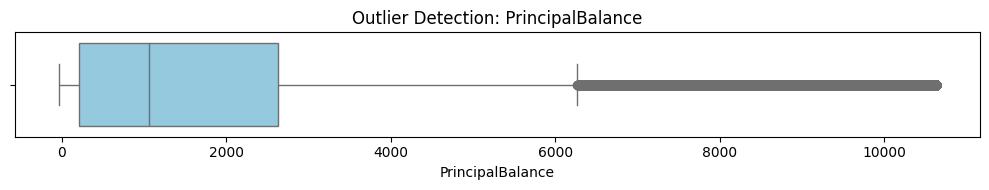

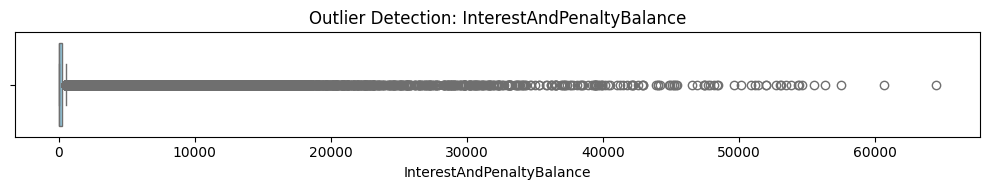

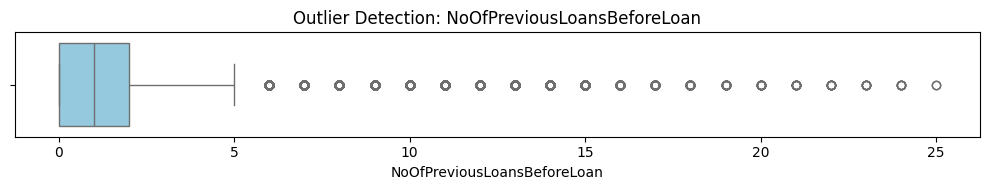

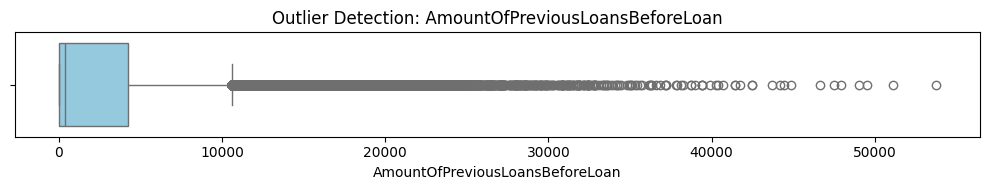

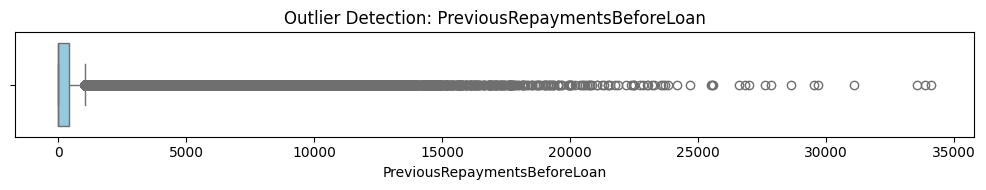

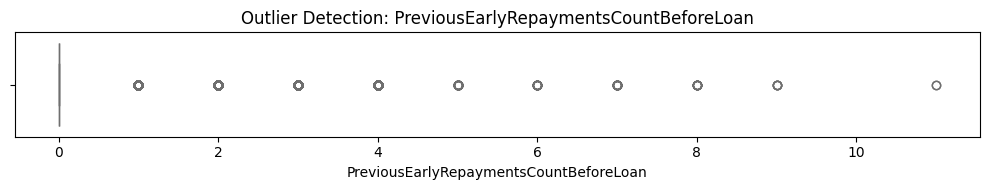

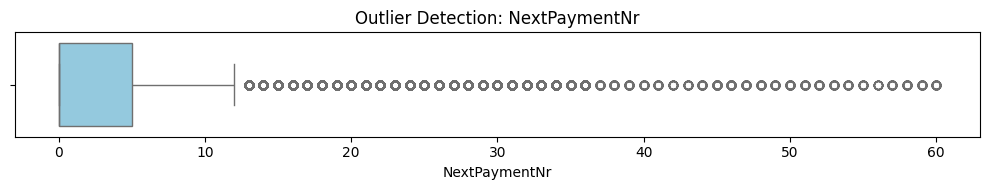

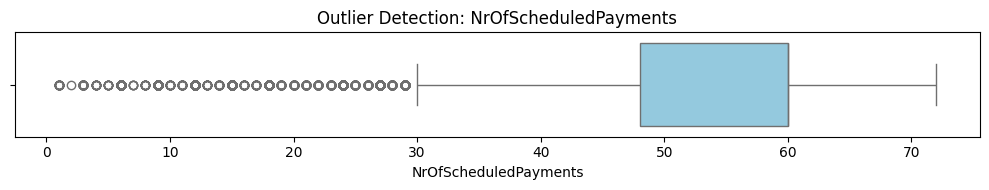

In [ ]:
columns_to_check = [
    'AppliedAmount','Amount','Interest','LoanDuration','MonthlyPayment','Age','IncomeFromPrincipalEmployer',
    'IncomeFromPension','IncomeFromFamilyAllowance','IncomeFromSocialWelfare','IncomeFromLeavePay',
    'IncomeFromChildSupport','IncomeOther','IncomeTotal','ExistingLiabilities','LiabilitiesTotal',
    'RefinanceLiabilities','DebtToIncome','FreeCash','PlannedInterestTillDate','ExpectedLoss',
    'LossGivenDefault','ExpectedReturn','ProbabilityOfDefault','PrincipalOverdueBySchedule',
    'PrincipalPaymentsMade','InterestAndPenaltyPaymentsMade','PrincipalBalance','InterestAndPenaltyBalance',
    'NoOfPreviousLoansBeforeLoan','AmountOfPreviousLoansBeforeLoan','PreviousRepaymentsBeforeLoan',
    'PreviousEarlyRepaymentsCountBeforeLoan','NextPaymentNr','NrOfScheduledPayments'
]

# Plotting boxplots for each column to visualize outliers
for col in columns_to_check:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outlier Detection: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
# List of columns to handle outliers
columns_with_outliers = [
    'AppliedAmount','Amount','Interest','MonthlyPayment','IncomeFromPrincipalEmployer',
    'IncomeFromPension','IncomeFromFamilyAllowance','IncomeFromSocialWelfare','IncomeFromLeavePay',
    'IncomeFromChildSupport','IncomeOther','IncomeTotal','ExistingLiabilities','LiabilitiesTotal',
    'RefinanceLiabilities','DebtToIncome','FreeCash','PlannedInterestTillDate','ExpectedLoss',
    'ExpectedReturn','ProbabilityOfDefault','PrincipalOverdueBySchedule',
    'PrincipalPaymentsMade','InterestAndPenaltyPaymentsMade','PrincipalBalance','InterestAndPenaltyBalance',
    'NoOfPreviousLoansBeforeLoan','AmountOfPreviousLoansBeforeLoan','PreviousRepaymentsBeforeLoan',
    'PreviousEarlyRepaymentsCountBeforeLoan','NextPaymentNr','NrOfScheduledPayments'
]

# Apply IQR-based capping
for col in columns_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


## Checking For Correlation

**Correlation Checking** _ Correlation checking is the process of measuring how strongly two numerical variables are related to each other. It helps identify whether changes in one variable are associated with changes in another—positively, negatively, or not at all. This step is important in data analysis to detect redundant features, avoid multicollinearity, and improve model performance.

In [ ]:
df

LoanNumber  BidsPortfolioManager  BidsApi  BidsManual  \
0              659                     0        0    115.0410   
1              654                     0        0    140.6057   
2              641                     0        0    319.5580   
3              668                     0        0     57.5205   
4              652                     0        0    319.5582   
...            ...                   ...      ...         ...   
134524      283484                  2515        0    485.0000   
134525      285168                  1880        0   1120.0000   
134526      281602                  1975        0    525.0000   
134527      285431                  1840        0   1160.0000   
134528      285630                  2990        0     10.0000   

        NewCreditCustomer  ApplicationSignedHour  ApplicationSignedWeekday  \
0                       1                     17                         5   
1                       0                     20                         4   
2                       1                     20                         6   
3                       1                     12                         7   
4                       1                     10                         4   
...                   ...                    ...                       ...   
134524                  1                     16                         6   
134525                  0                     16                         2   
134526                  1                     13                         6   
134527                  0                     16                         2   
134528                  0                     11                         3   

        VerificationType  LanguageCode  Age  Gender  Country  AppliedAmount  \
0                    2.0             1   61     1.0        0       319.5582   
1                    2.0             1   48     1.0        0       191.7349   
2                    2.0             1   58     1.0        0       319.5582   
3                    2.0             1   23     1.0        0       127.8233   
4                    2.0             1   25     1.0        0       319.5582   
...                  ...           ...  ...     ...      ...            ...   
134524               3.0             4   37     0.0        2      3000.0000   
134525               3.0             4   35     0.0        2      3000.0000   
134526               1.0             4   40     0.0        2      2500.0000   
134527               4.0             1   47     1.0        0      3000.0000   
134528               4.0             1   21     1.0        0      3000.0000   

           Amount  Interest  LoanDuration  MonthlyPayment  County  City  \
0        115.0408     30.00            12           46.69     234  6398   
1        140.6057     25.00             1           46.69     283  2709   
2        319.5409     25.00            20           46.69     732  5188   
3         57.5205     45.00            15           46.69     234  4689   
4        319.5436     30.00            12           46.69     856  6446   
...           ...       ...           ...             ...     ...   ...   
134524  3000.0000     31.01            60          107.68     724  3258   
134525  3000.0000     18.25            60           85.33     665  2231   
134526  2500.0000     24.83            60           80.42     934  5981   
134527  3000.0000     17.74            60           84.51     916  6955   
134528  3000.0000     30.50            60          106.74     234  6398   

        UseOfLoan  Education  MaritalStatus  EmploymentStatus  \
0               7        3.0            1.0               3.0   
1               7        5.0            4.0               3.0   
2               2        4.0            1.0               3.0   
3               0        2.0            3.0              -1.0   
4               6        4.0            2.0               3.0   
...           ...        ...            ...       

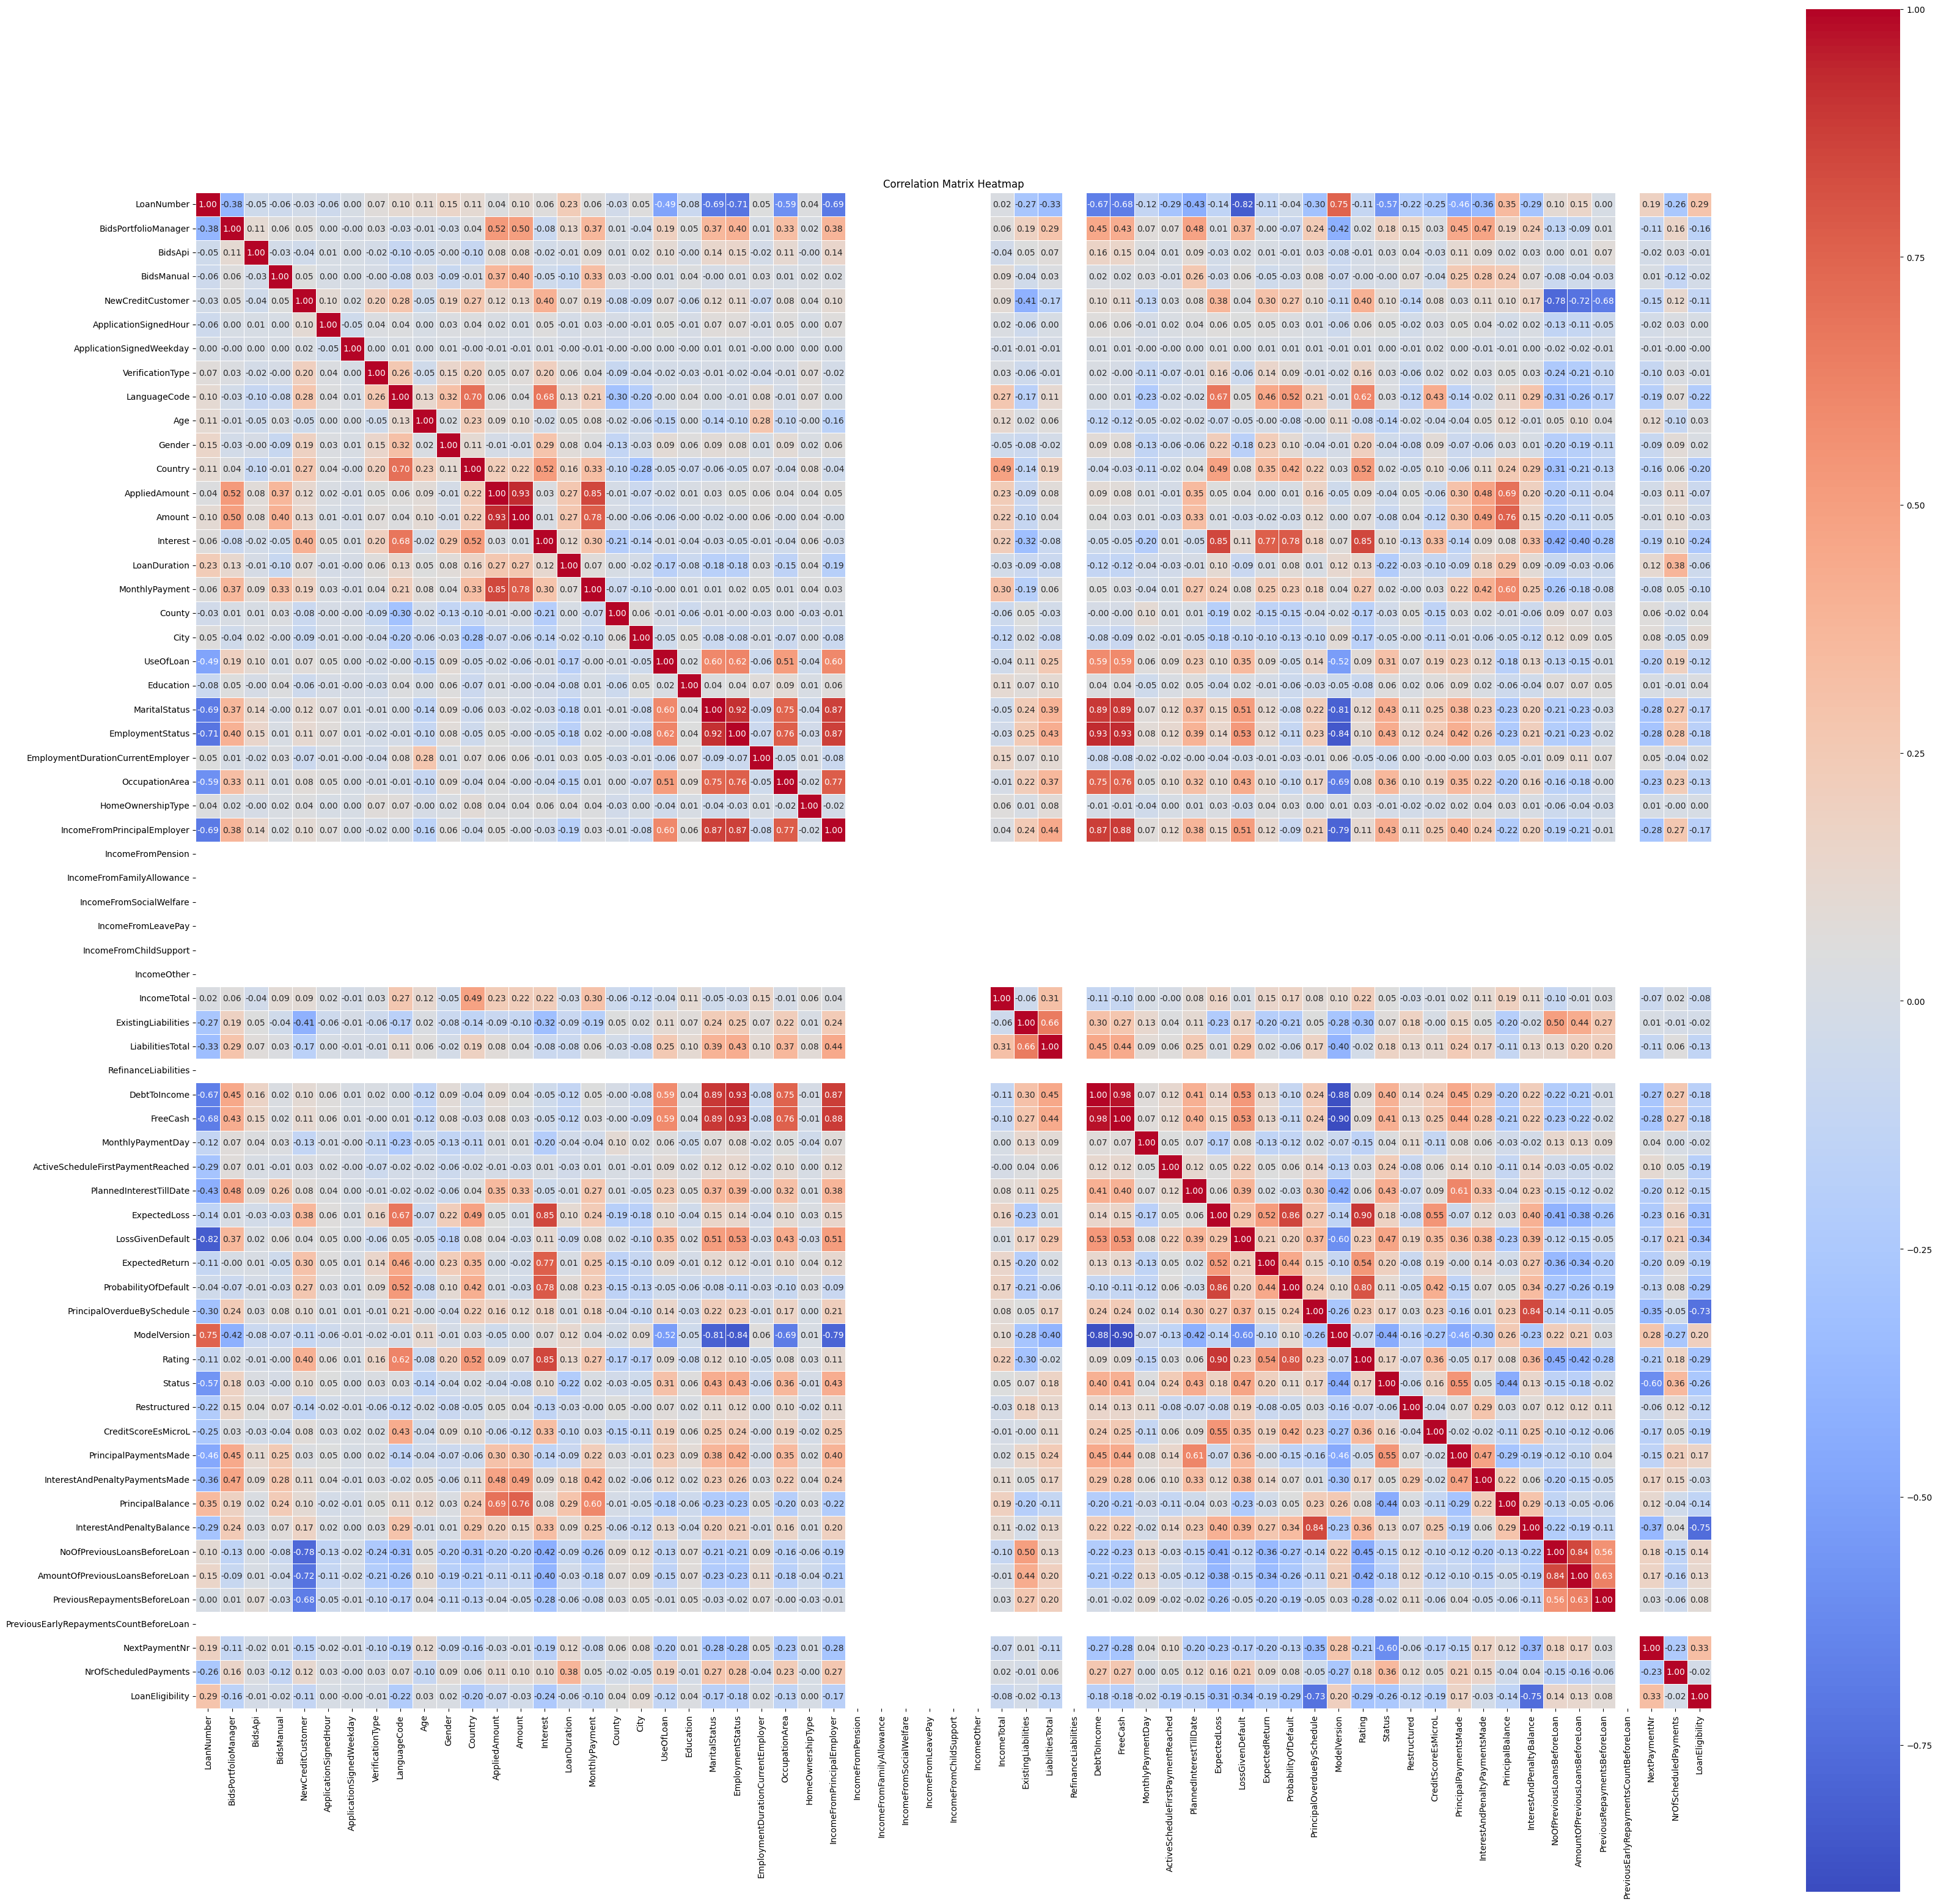

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
df['ExpectedLoss']

0         0.123398
1         0.123398
2         0.123398
3         0.123398
4         0.123398
            ...   
134524    0.146732
134525    0.053246
134526    0.104219
134527    0.035612
134528    0.116235
Name: ExpectedLoss, Length: 134529, dtype: float64

In [ ]:
df_new=df[['NextPaymentNr','ExpectedLoss','LossGivenDefault','ProbabilityOfDefault','PrincipalOverdueBySchedule','InterestAndPenaltyBalance','LoanEligibility']]
df_new

NextPaymentNr  ExpectedLoss  LossGivenDefault  ProbabilityOfDefault  \
0                 0.0      0.123398          0.506748              0.234140   
1                 0.0      0.123398          0.506748              0.234140   
2                 0.0      0.123398          0.506748              0.234140   
3                 0.0      0.123398          0.506748              0.234140   
4                 0.0      0.123398          0.506748              0.234140   
...               ...           ...               ...                   ...   
134524            0.0      0.146732          0.900000              0.125412   
134525            0.0      0.053246          0.900000              0.045510   
134526            0.0      0.104219          0.900000              0.089076   
134527            0.0      0.035612          0.650000              0.042144   
134528            0.0      0.116235          0.650000              0.137556   

        PrincipalOverdueBySchedule  InterestAndPenaltyBalance  LoanEligibility  
0                            0.000                       0.00                1  
1                            0.000                       0.00                1  
2                          116.350                     414.07                0  
3                            0.000                       0.00                1  
4                            0.000                       0.00                0  
...                            ...                        ...              ...  
134524                       0.000                       0.00                0  
134525                       0.000                       0.00                1  
134526                     132.275                     507.25                0  
134527                     132.275                       0.00                0  
134528                     132.275                     507.25                0  

[134529 rows x 7 columns]

## Checking For Multicollinearity

**Multicollinearity** _ Multicollinearity refers to a situation in a dataset where two or more independent (predictor) variables are highly correlated with each other. This can cause problems in regression models and other statistical analyses.

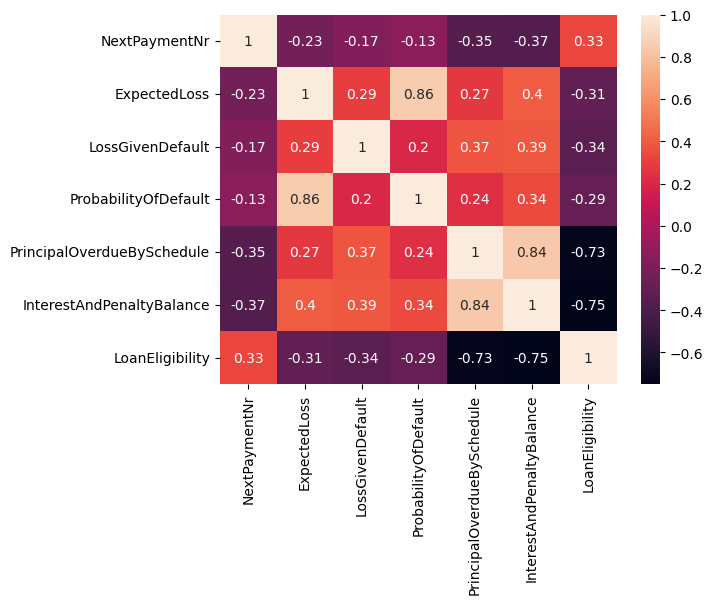

In [ ]:
sns.heatmap(df_new.corr(),annot=True)
plt.show()

## Data Scaling

**Data Scaling** _ Data Scaling is the process of transforming numerical features so they have a consistent range or distribution, typically for better model performance.


*   **Standardization** _ Feature scaling techniques used to bring numerical data into a comparable range.Transforms the data to have mean = 0 and standard deviation = 1.
*   **Normalization** _ Feature scaling techniques used to bring numerical data into a comparable range.Rescales the data into a fixed range, usually [0, 1].



In [ ]:
SibSp_std = StandardScaler()
df_new['ExpectedLoss'] = SibSp_std.fit_transform(df_new[['ExpectedLoss']])


/tmp/ipython-input-70-2334839461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ExpectedLoss'] = SibSp_std.fit_transform(df_new[['ExpectedLoss']])


In [ ]:
SibSp_std = StandardScaler()
df_new['LossGivenDefault'] = SibSp_std.fit_transform(df_new[['LossGivenDefault']])


/tmp/ipython-input-71-438333209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['LossGivenDefault'] = SibSp_std.fit_transform(df_new[['LossGivenDefault']])


In [ ]:
SibSp_std = StandardScaler()
df_new['ProbabilityOfDefault'] = SibSp_std.fit_transform(df_new[['ProbabilityOfDefault']])


/tmp/ipython-input-72-537462998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ProbabilityOfDefault'] = SibSp_std.fit_transform(df_new[['ProbabilityOfDefault']])


In [ ]:
SibSp_std = StandardScaler()
df_new['PrincipalOverdueBySchedule'] = SibSp_std.fit_transform(df_new[['PrincipalOverdueBySchedule']])


/tmp/ipython-input-73-659503133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['PrincipalOverdueBySchedule'] = SibSp_std.fit_transform(df_new[['PrincipalOverdueBySchedule']])


In [ ]:
SibSp_std = StandardScaler()
df_new['InterestAndPenaltyBalance'] = SibSp_std.fit_transform(df_new[['InterestAndPenaltyBalance']])


/tmp/ipython-input-74-758931208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['InterestAndPenaltyBalance'] = SibSp_std.fit_transform(df_new[['InterestAndPenaltyBalance']])


## Feature Extraction And Removal

**Feature Extraction** _ Feature extraction involves creating new features from the raw data to better represent the underlying structure of the data for modeling. The goal is to improve model performance by using informative, compact representations of the data.

**Feature Removal** _ Feature removal is the process of dropping irrelevant, redundant, or noisy features from your dataset that may degrade model performance or increase complexity.

# SPLITTING DATASET

**Dataset Splitting** _ Dataset splitting is the process of dividing your full dataset into separate parts for training, validation, and testing to evaluate and improve your machine learning model.

In [ ]:
X = df_new.drop('LoanEligibility', axis=1)
y = df_new['LoanEligibility']

In [ ]:
X

NextPaymentNr  ExpectedLoss  LossGivenDefault  ProbabilityOfDefault  \
0                 0.0     -0.200427          0.306991             -0.114073   
1                 0.0     -0.200427          0.306991             -0.114073   
2                 0.0     -0.200427          0.306991             -0.114073   
3                 0.0     -0.200427          0.306991             -0.114073   
4                 0.0     -0.200427          0.306991             -0.114073   
...               ...           ...               ...                   ...   
134524            0.0      0.028080          1.567567             -0.875343   
134525            0.0     -0.887412          1.567567             -1.434784   
134526            0.0     -0.388246          1.567567             -1.129752   
134527            0.0     -1.060105          0.766187             -1.458349   
134528            0.0     -0.270577          0.766187             -0.790317   

        PrincipalOverdueBySchedule  InterestAndPenaltyBalance  
0                        -0.609138                  -0.614568  
1                        -0.609138                  -0.614568  
2                         1.569694                   1.407904  
3                        -0.609138                  -0.614568  
4                        -0.609138                  -0.614568  
...                            ...                        ...  
134524                   -0.609138                  -0.614568  
134525                   -0.609138                  -0.614568  
134526                    1.867914                   1.863030  
134527                    1.867914                  -0.614568  
134528                    1.867914                   1.863030  

[134529 rows x 6 columns]

In [ ]:
y

0         1
1         1
2         0
3         1
4         0
         ..
134524    0
134525    1
134526    0
134527    0
134528    0
Name: LoanEligibility, Length: 134529, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ALGORITHMS

An algorithm is a step-by-step set of instructions or rules designed to perform a specific task or solve a particular problem.In Machine Learning, an algorithm is a mathematical method used to learn patterns from data.Helps predict outcomes, classify data, or optimize decisions based on input features.

**Types Of Algorithms**

*   Supervised Learning _ Predict a target based on labeled data
*   Unsupervised Learning _ Find patterns in unlabeled data
*   Reinforcement Learning _ Learn actions through rewards & penalties




**Accuracy** _ Overall correctness of the model.

**Confusion Matrix** _ Table showing correct and incorrect predictions.

 **Structure of a Confusion Matrix (for Binary Classification):**

               Predicted: No (0)	  Predicted: Yes (1)

Actual: No(0)  	 True Negative (TN)	   False Positive (FP)


Actual: Ye (1)	 False Negative (FN)	  True Positive (TP)



**Precision** _ Out of all predicted positives how many are truly positive.

**Recall** _ Out of all actual positives how many did the model correctly find.

**F1-Score** _ Harmonic mean of precision and recall.Best when data is imbalanced.

## K-Nearest Neighbors Classifier

The K-Nearest Neighbors (KNN) classifier is a simple, non-parametric, and instance-based machine learning algorithm used for classification (and also regression).Simple to understand and implement.No training phase (lazy learner).Works well with small datasets.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train,y_train)

0.9512650641591481

In [ ]:
knn.score(X_test,y_test)

0.9368542332565227

In [ ]:
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

Accuracy: 0.9368542332565227

Confusion Matrix:
 [[ 9369  1346]
 [  353 15838]]
Precision: 0.921671322160149
Recall: 0.978197764189982
F1 Score: 0.9490936329588014


## Logistic Regression

Logistic Regression is a supervised machine learning algorithm used for classification problems. Despite the name “regression,” it’s actually used to predict categorical outcomes, especially binary classification (e.g., Yes/No, 0/1).Simple and fast.Outputs probabilities.Works well with linearly separable classes.

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)


LogisticRegression()

In [ ]:
logistic.score(X_train,y_train)

0.948672681490016

In [ ]:
logistic.score(X_test,y_test)

0.9461830075076191

In [ ]:
y_pred_logistic = logistic.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic))

Accuracy: 0.9461830075076191

Confusion Matrix:
 [[ 9329  1386]
 [   62 16129]]
Precision: 0.9208678275763631
Recall: 0.9961707121240195
F1 Score: 0.9570402895626892


## Random Forest Classifier

A Random Forest Classifier is an ensemble learning algorithm that builds multiple decision trees and merges them together to get a more accurate and stable prediction.High accuracy and robustness.
Handles missing values and categorical variables.Works well for large datasets.

In [ ]:
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
randomforest.score(X_train,y_train)

0.9794746476124991

In [ ]:
randomforest.score(X_test,y_test)

0.9536906266260313

In [ ]:
y_pred_randomforest = randomforest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_randomforest))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_randomforest))
print("Precision:", precision_score(y_test, y_pred_randomforest))
print("Recall:", recall_score(y_test, y_pred_randomforest))
print("F1 Score:", f1_score(y_test, y_pred_randomforest))

Accuracy: 0.9536906266260313

Confusion Matrix:
 [[ 9790   925]
 [  321 15870]]
Precision: 0.9449240845489729
Recall: 0.9801741708356494
F1 Score: 0.9622263990783969


## Decision Tree Classifier

A Decision Tree Classifier is a supervised machine learning algorithm used for classification (and regression) tasks. It splits the data into branches based on feature values, creating a tree-like structure where each node represents a decision rule, and each leaf represents a class label.Easy to interpret and visualize.Handles both numerical and categorical data.No need for feature scaling.Works well with non-linear data

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
decisiontree.score(X_train,y_train)

0.9794839393066538

In [ ]:
decisiontree.score(X_test,y_test)

0.9444733516687728

In [ ]:
y_pred_decisiontree = decisiontree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_decisiontree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_decisiontree))
print("Precision:", precision_score(y_test, y_pred_decisiontree))
print("Recall:", recall_score(y_test, y_pred_decisiontree))
print("F1 Score:", f1_score(y_test, y_pred_decisiontree))

Accuracy: 0.9444733516687728

Confusion Matrix:
 [[ 9830   885]
 [  609 15582]]
Precision: 0.9462561486609583
Recall: 0.9623865110246433
F1 Score: 0.9542531692081573


## AdaBoost Classifier

AdaBoost (Adaptive Boosting) is an ensemble learning algorithm that combines multiple weak learners (usually shallow decision trees) to form a strong classifier. It focuses more on incorrectly classified samples, improving accuracy over iterations.Improves accuracy of weak models.Works well with structured/tabular data.Resistant to overfitting (in many cases)

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
adaboost.score(X_train,y_train)

0.9609284260799271

In [ ]:
adaboost.score(X_test,y_test)

0.9585222626923363

In [ ]:
y_pred_adaboost = adaboost.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_adaboost))
print("Precision:", precision_score(y_test, y_pred_adaboost))
print("Recall:", recall_score(y_test, y_pred_adaboost))
print("F1 Score:", f1_score(y_test, y_pred_adaboost))

Accuracy: 0.9585222626923363

Confusion Matrix:
 [[ 9664  1051]
 [   65 16126]]
Precision: 0.9388135297199743
Recall: 0.9959854240009882
F1 Score: 0.9665547830256533


## Support Vector Machine

Support Vector Machine is a supervised learning algorithm used for classification (and also regression) tasks. It tries to find the optimal hyperplane that separates data into different classes with the maximum margin.Effective in high-dimensional spaces.Works well for both linear and non-linear data (via kernel trick).Robust to overfitting in high-dimensional space.





In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [ ]:
svm.score(X_train,y_train)

0.9498248515651859

In [ ]:
svm.score(X_test,y_test)

0.9473351668772765

In [ ]:
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

Accuracy: 0.9473351668772765

Confusion Matrix:
 [[ 9389  1326]
 [   91 16100]]
Precision: 0.9239068059221852
Recall: 0.9943795936013835
F1 Score: 0.9578487074991819


## Naive Bayes Classifier

The Naive Bayes classifier is a probabilistic supervised learning algorithm based on Bayes’ Theorem, with a strong (naive) assumption of independence between features.Fast and efficient, especially with large datasets.Assumes features are independent of each other.Works best with categorical or text data.

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb.score(X_train,y_train)

0.9600642985235498

In [ ]:
nb.score(X_test,y_test)

0.957518769047796

In [ ]:
y_pred_nb = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))

Accuracy: 0.957518769047796

Confusion Matrix:
 [[ 9660  1055]
 [   88 16103]]
Precision: 0.9385126471616738
Recall: 0.9945648817244148
F1 Score: 0.9657261087288974


# ROC AND AUC

**ROC Curve (Receiver Operating Characteristic Curve)**
The ROC curve is a graphical representation that shows the performance of a binary classification model by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

TPR (Recall): How many actual positives were correctly identified.

FPR: How many actual negatives were incorrectly classified as positives.

The curve helps visualize how well the model distinguishes between classes across different thresholds.

**AUC (Area Under the Curve)**
AUC is a single scalar value that summarizes the performance of the model across all thresholds.

AUC = 1.0: Perfect model.

AUC = 0.5: No better than random guessing.

The closer to 1, the better the model.

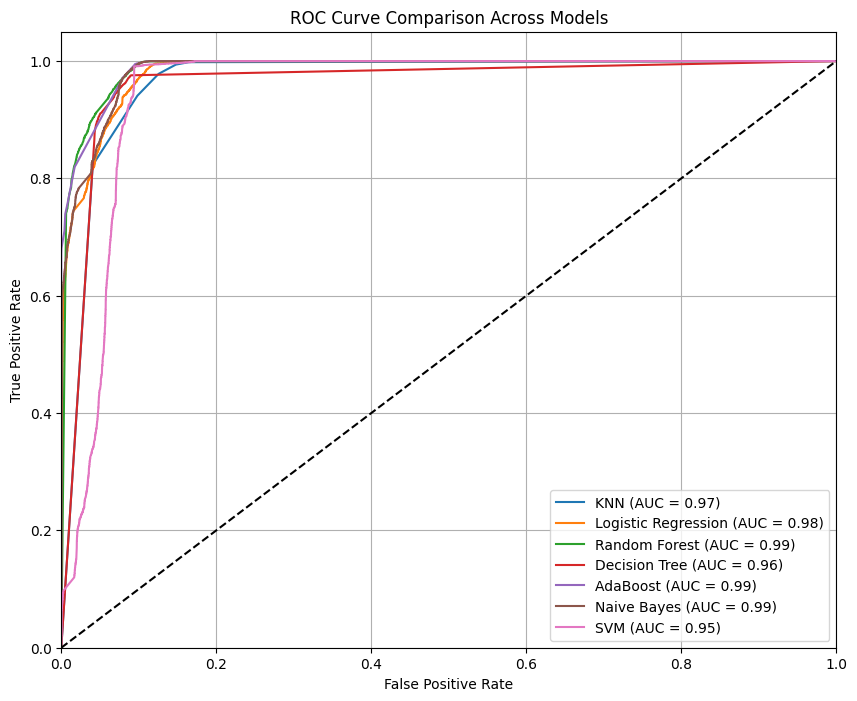

In [ ]:
plt.figure(figsize=(10, 8))

# Dictionary to store models and their predicted probabilities
models_proba = {
    'KNN': knn.predict_proba(X_test)[:, 1],
    'Logistic Regression': logistic.predict_proba(X_test)[:, 1],
    'Random Forest': randomforest.predict_proba(X_test)[:, 1],
    'Decision Tree': decisiontree.predict_proba(X_test)[:, 1],
    'AdaBoost': adaboost.predict_proba(X_test)[:, 1],
    'Naive Bayes': nb.predict_proba(X_test)[:, 1],
    'SVM': svm.decision_function(X_test)  # Use decision_function for SVM
}

# Plot ROC for each model
for name, y_score in models_proba.items():
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# AUC scores from your ROC plot
auc_scores = {
    "KNN": 0.97,
    "Logistic Regression": 0.98,
    "Random Forest": 0.99,
    "Decision Tree": 0.96,
    "AdaBoost": 0.99,
    "Naive Bayes": 0.99,
    "SVM": 0.95
}

# Find the highest AUC value
max_auc = max(auc_scores.values())

# Find the model(s) with the highest AUC
best_models = [model for model, auc in auc_scores.items() if auc == max_auc]

# Print results
print(f"✅ Best AUC Score: {max_auc}")
print("🏆 Best Performing Model(s):")
for model in best_models:
    print(f"- {model}")


✅ Best AUC Score: 0.99
🏆 Best Performing Model(s):
- Random Forest
- AdaBoost
- Naive Bayes


# MODEL COMPARISON

In [ ]:
models = {
    "KNN": y_pred_knn,
    "Logistic Regression": y_pred_logistic,
    "Random Forest": y_pred_randomforest,
    "Decision Tree": y_pred_decisiontree,
    "AdaBoost": y_pred_adaboost,
    "Naive Bayes": y_pred_nb,
    "SVM": y_pred_svm
}

# Store performance metrics
performance = {}

print("Model Performance Summary:\n")
for model_name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    performance[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "Average": (acc + prec + rec + f1) / 4
    }

    print(f"{model_name}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}\n")

# Find the best model based on highest average metric
best_model = max(performance.items(), key=lambda x: x[1]["Average"])
print(f"✅ Best Model Based on Overall Performance: {best_model[0]}")


Model Performance Summary:

KNN:
  Accuracy:  0.9369
  Precision: 0.9217
  Recall:    0.9782
  F1 Score:  0.9491

Logistic Regression:
  Accuracy:  0.9462
  Precision: 0.9209
  Recall:    0.9962
  F1 Score:  0.9570

Random Forest:
  Accuracy:  0.9537
  Precision: 0.9449
  Recall:    0.9802
  F1 Score:  0.9622

Decision Tree:
  Accuracy:  0.9445
  Precision: 0.9463
  Recall:    0.9624
  F1 Score:  0.9543

AdaBoost:
  Accuracy:  0.9585
  Precision: 0.9388
  Recall:    0.9960
  F1 Score:  0.9666

Naive Bayes:
  Accuracy:  0.9575
  Precision: 0.9385
  Recall:    0.9946
  F1 Score:  0.9657

SVM:
  Accuracy:  0.9473
  Precision: 0.9239
  Recall:    0.9944
  F1 Score:  0.9578

✅ Best Model Based on Overall Performance: AdaBoost


# PERFORMANCE METRICS

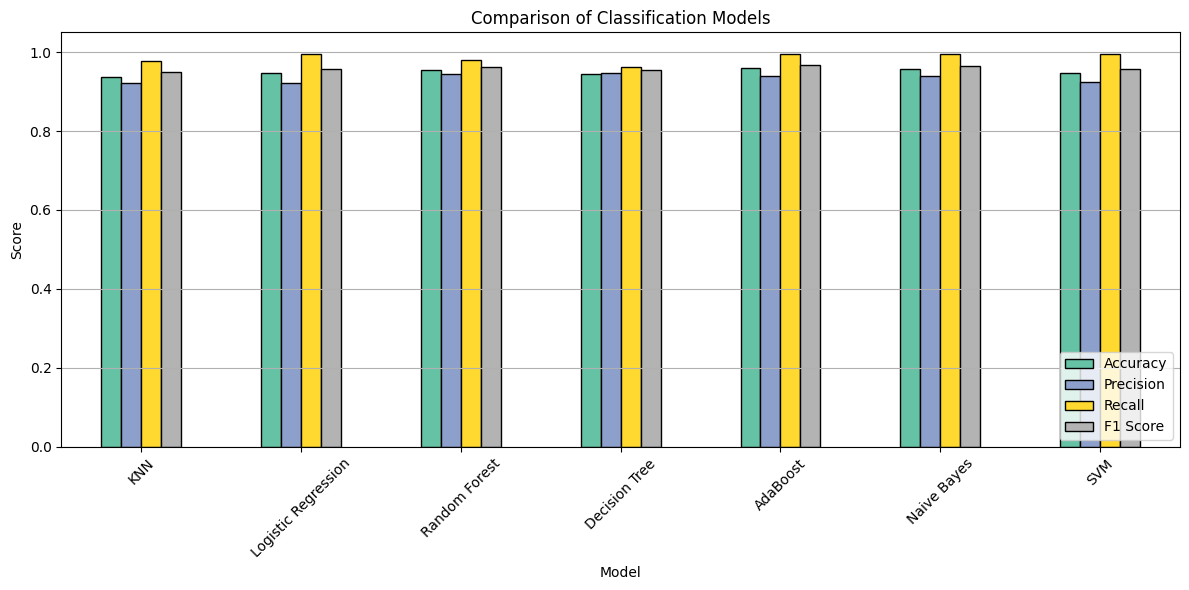

In [ ]:

model_names = []
accuracy = []
precision = []
recall = []
f1 = []

for model_name, y_pred in models.items():
    model_names.append(model_name)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Create DataFrame for plotting
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Plot
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 6), colormap='Set2', edgecolor='black')
plt.title('Comparison of Classification Models')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
